In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN,AgglomerativeClustering
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestNeighbors

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

from collections import Counter
from os.path import join
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.base import clone
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import dendrogram
from sklearn.manifold import TSNE
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import graphviz

import sompy
from sompy.visualization.mapview import View2D
from sompy.visualization.bmuhits import BmuHitsView
from sompy.visualization.hitmap import HitMapView
sns.set()

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("data_prespective.csv")

In [3]:
data.set_index("ID", inplace=True)

In [4]:
data.head()

,Age,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,TeamActivities,RacketActivities,CombatActivities,SpecialActivities,OtherActivities,Dropout,Active_Period,Contract_Duration,PercentageOfVisits,MonthlyValue,PercentageOfClasses,Freq_Visits_Day,Visits_ActivePeriod,Gender_Female
ID,,,,,,,,,,,,,,,,,,,
10000,3.083333,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,-0.490868,1.15,3.017065,1.866571,0.763419,-0.201465,1
10001,0.500000,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0.989071,0.285388,-0.20,0.607509,0.104392,-0.204771,-0.501832,1
10002,0.000000,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,-0.016393,-0.554795,0.50,0.493905,0.000000,1.208748,0.619048,0
10003,-1.166667,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0.989071,-0.257991,0.35,0.176012,0.239981,0.463221,-0.300366,0
10004,1.000000,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,-0.016393,1.152968,-0.50,-0.611409,0.000000,-0.255467,-0.600733,0


In [5]:
data.columns

Index(['Age', 'UseByTime', 'AthleticsActivities', 'WaterActivities',
       'FitnessActivities', 'TeamActivities', 'RacketActivities',
       'CombatActivities', 'SpecialActivities', 'OtherActivities', 'Dropout',
       'Active_Period', 'Contract_Duration', 'PercentageOfVisits',
       'MonthlyValue', 'PercentageOfClasses', 'Freq_Visits_Day',
       'Visits_ActivePeriod', 'Gender_Female'],
      dtype='object')

In [8]:
metric_features = ['Age','Contract_Duration', 'PercentageOfVisits', 'PercentageOfClasses',
       'Freq_Visits_Day', 'Visits_ActivePeriod', 'MonthlyValue','Active_Period']

In [60]:
activities = ['AthleticsActivities', 'WaterActivities','FitnessActivities','TeamActivities','RacketActivities','CombatActivities','SpecialActivities','OtherActivities']
compare = ['Dropout', 'Gender_Female','UseByTime']

In [61]:
demographic_perspective = ['Age', 'Active_Period', 'MonthlyValue', 'Contract_Duration']
df_demographic = data[demographic_perspective]

In [62]:
frequency_perspective = [ 'PercentageOfVisits', 'PercentageOfClasses',
       'Freq_Visits_Day', 'Visits_ActivePeriod']

df_frequency = data[frequency_perspective]

#### Necessary Functions

In [6]:
def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

In [7]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
       
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) 
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

## DBSCAN FOR OUTLIER REMOVAL:

 Since we know that our data is highly skewed and contains outliers not removed, we apply a DBSCAN to try to detect the remaining outliers.

 We need to define the parameters of our model ( **ε** and **min_samples**):
 
 -  **min_samples**  is, on a first approach, considered **2 x dim** where dim is the dimension of our metric features;
 - **ε** can be found by ploting a **k-distance graph** (distance to the kth (k = min_samples - 1) nearest neighbor ordered from the largest to the smallest value). The **elbow** of this graph is considered a good value for ε.

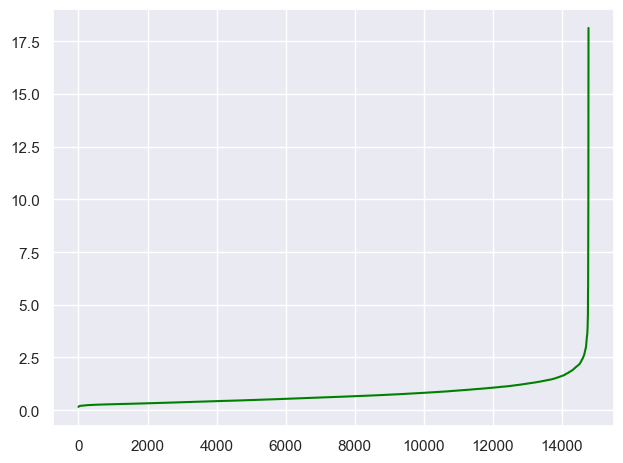

In [13]:
neigh = NearestNeighbors(n_neighbors = (2 * len(metric_features)) - 1)
neigh.fit(data[metric_features])
distances, _ = neigh.kneighbors(data[metric_features])
distances = np.sort(distances[:, -1])
#plt.yticks(np.arange(1,22,0.5))
plt.plot(distances, color = 'green')
plt.show()

An **ε** of 2.25 is selected as the optimal value.

In [14]:
dbscan = DBSCAN(eps=2.25, min_samples = 2 * len(metric_features), n_jobs = -1)
dbscan_labels = dbscan.fit_predict(data[metric_features])

Counter(dbscan_labels)

Counter({0: 14687, -1: 86})

In [15]:
data_dbscan_out = data[dbscan_labels == -1]
data = data[dbscan_labels != -1]

### SOM + K-means clustering

### Frequency Perspective

In [16]:
activities = ['AthleticsActivities', 'WaterActivities','FitnessActivities','TeamActivities','RacketActivities','CombatActivities','SpecialActivities','OtherActivities']
compare = ['Dropout', 'Gender_Female','UseByTime']

In [17]:
frequency_perspective = [ 'PercentageOfVisits', 'PercentageOfClasses',
       'Freq_Visits_Day', 'Visits_ActivePeriod']

In [18]:
np.random.seed(42)

sm_frequency = sompy.SOMFactory().build(
    data[frequency_perspective].values, 
    mapsize=[50, 50],  
    initialization='random',
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=frequency_perspective
)

sm_frequency.train(n_job=-1, verbose='info', train_rough_len=50, train_finetune_len=50)

 Training...
 random_initialization took: 0.000000 seconds
 Rough training...
 radius_ini: 17.000000 , radius_final: 2.833333, trainlen: 50

 epoch: 1 ---> elapsed time:  8.805000, quantization error: 0.686526

 epoch: 2 ---> elapsed time:  7.298000, quantization error: 1.710097

 epoch: 3 ---> elapsed time:  7.558000, quantization error: 1.680330

 epoch: 4 ---> elapsed time:  7.220000, quantization error: 1.674811

 epoch: 5 ---> elapsed time:  6.603000, quantization error: 1.671094

 epoch: 6 ---> elapsed time:  6.495000, quantization error: 1.667543

 epoch: 7 ---> elapsed time:  6.630000, quantization error: 1.655841

 epoch: 8 ---> elapsed time:  7.014000, quantization error: 1.652650

 epoch: 9 ---> elapsed time:  7.029000, quantization error: 1.649663

 epoch: 10 ---> elapsed time:  9.211000, quantization error: 1.646430

 epoch: 11 ---> elapsed time:  8.070000, quantization error: 1.642443

 epoch: 12 ---> elapsed time:  6.902000, quantization error: 1.637962

 epoch: 13 ---> 

In [19]:
range_clusters = range(2, 10)

inertia = []
for n_clus in range_clusters:  
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=20, random_state=1)
    kmclust.fit(data[frequency_perspective])
    inertia.append(kmclust.inertia_)  

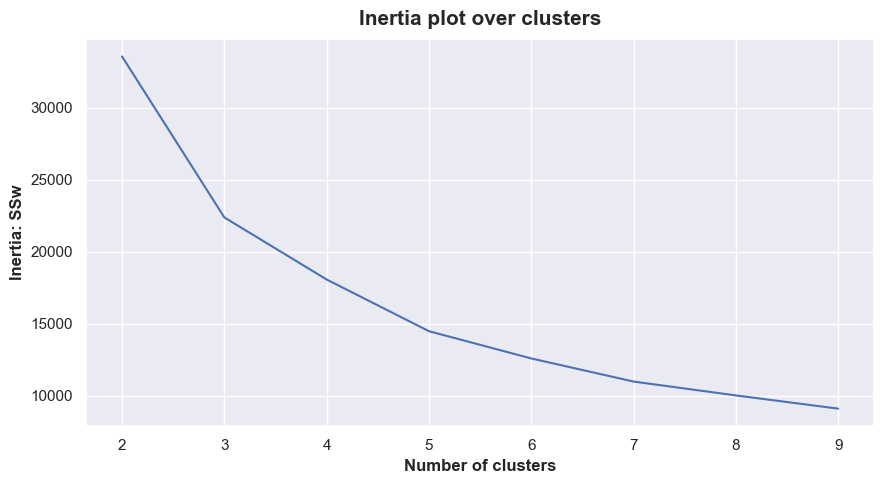

In [20]:
#perform inertia plot
plt.figure(figsize=(9,5))
plt.plot(range_clusters, inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

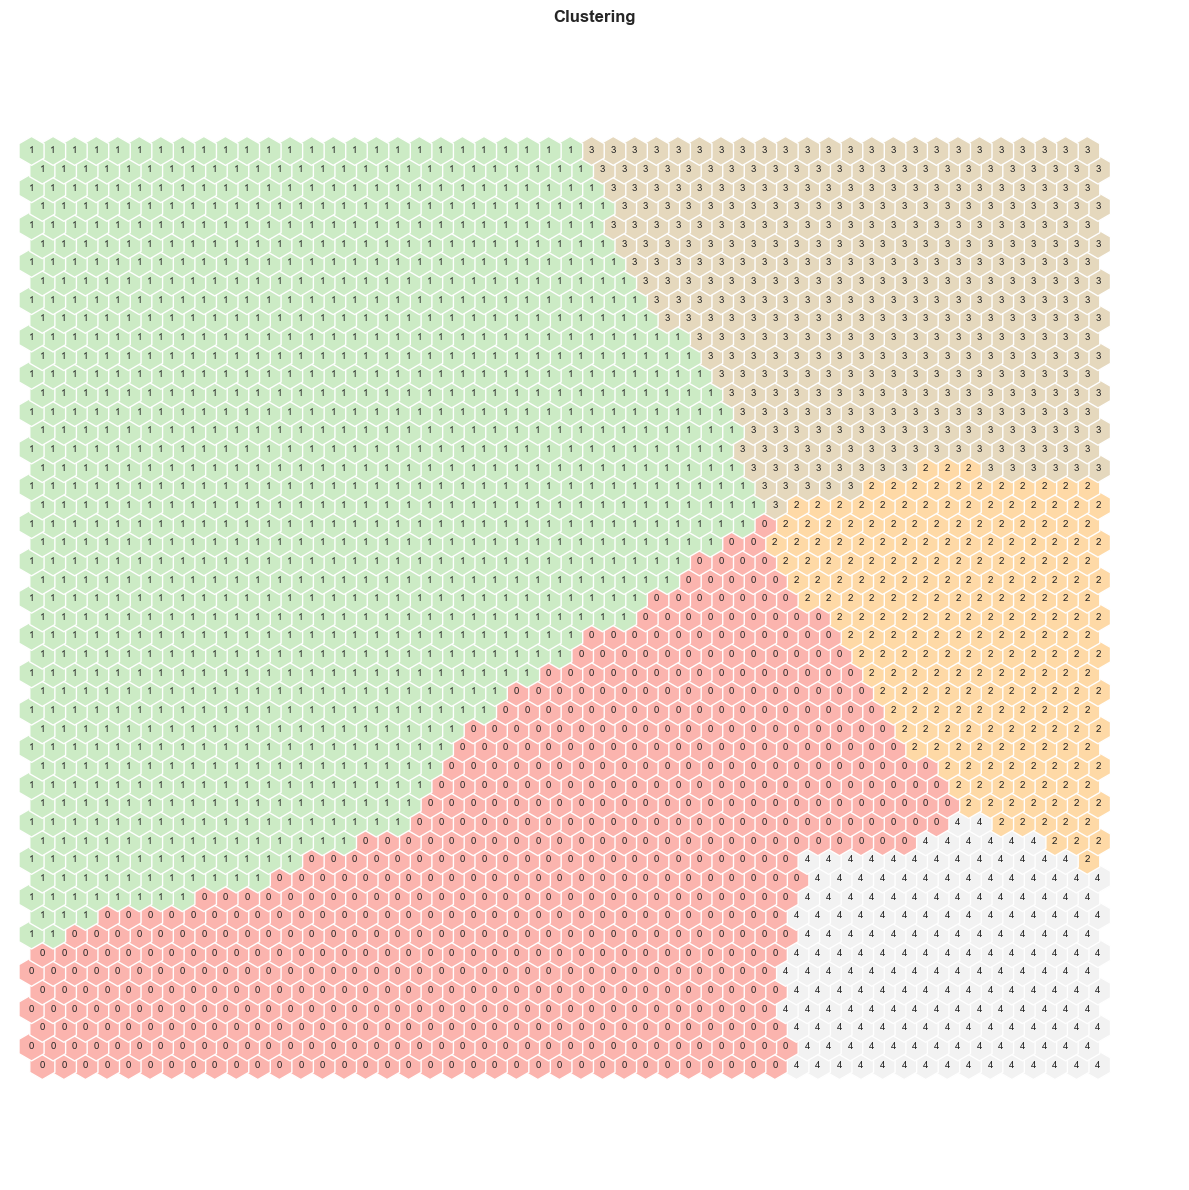

In [21]:
#performing K-Means clustering on top
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=20, random_state=42)
nodeclus_labels = kmeans.fit_predict(sm_frequency.codebook.matrix)
sm_frequency.cluster_labels = nodeclus_labels 

hits = HitMapView(12, 12,"Clustering", text_size=10)
hits.show(sm_frequency, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

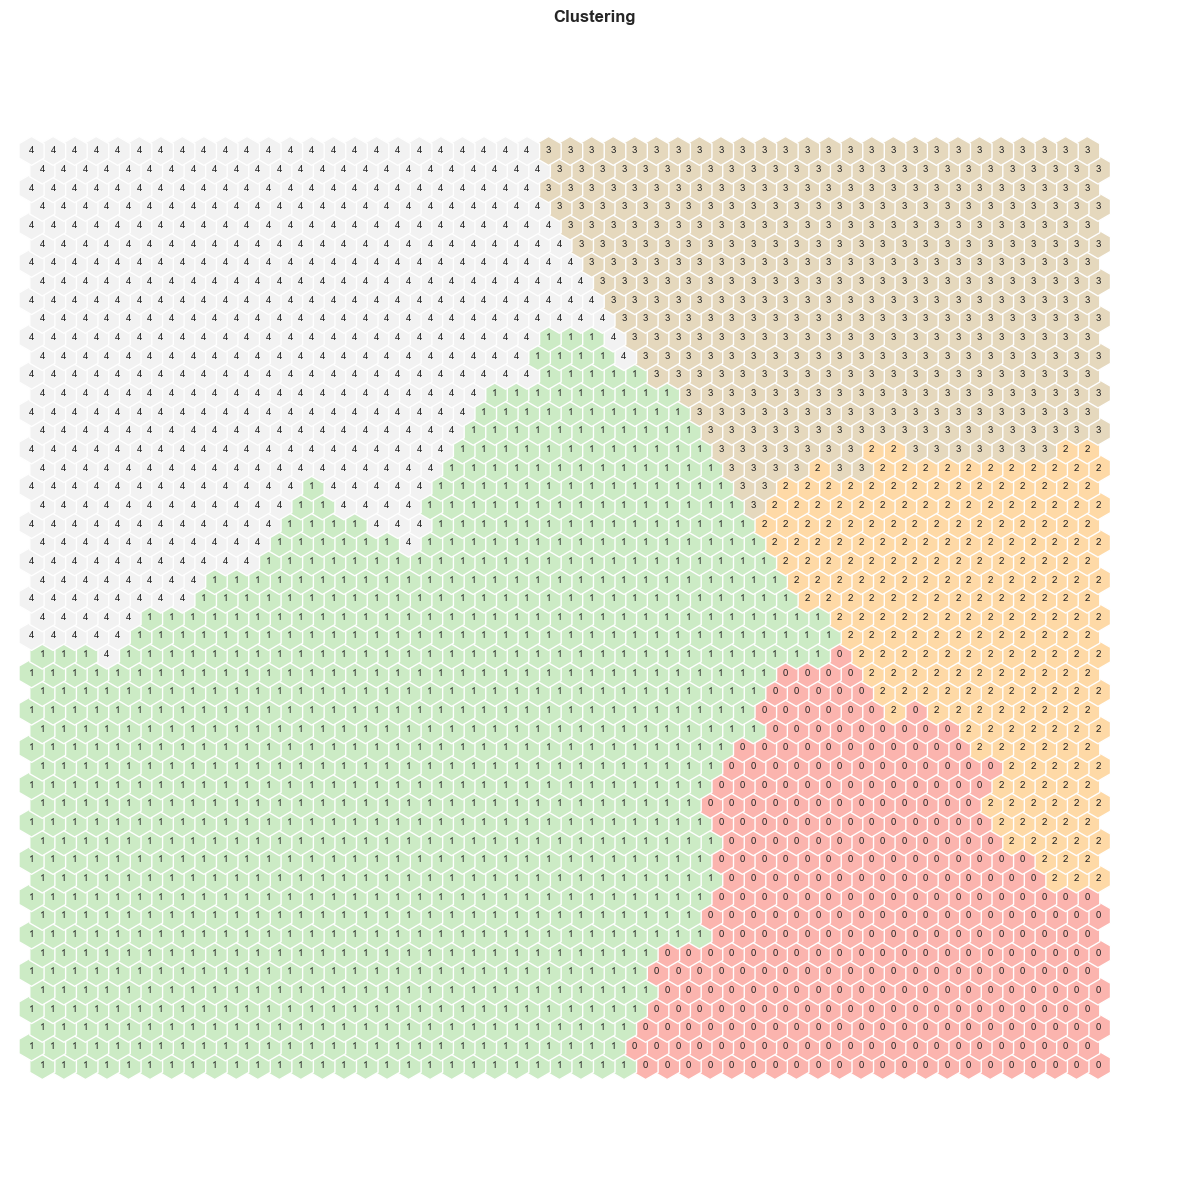

In [22]:
hierclust = AgglomerativeClustering(n_clusters=5, linkage='ward')
nodeclus_labels = hierclust.fit_predict(sm_frequency.codebook.matrix)
sm_frequency.cluster_labels = nodeclus_labels  # setting the cluster labels of sompy

hits  = HitMapView(12, 12,"Clustering",text_size=10)
hits.show(sm_frequency, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

In [23]:
nodes = sm_frequency.codebook.matrix

df_nodes = pd.DataFrame(nodes, columns=frequency_perspective)
df_nodes['label_freq'] = nodeclus_labels
df_nodes

,PercentageOfVisits,PercentageOfClasses,Freq_Visits_Day,Visits_ActivePeriod,label_freq
0,-0.890385,2.031913,-1.001091,-0.829927,3
1,-0.888510,1.981731,-0.940172,-0.828939,3
2,-0.887275,1.946546,-0.862265,-0.828343,3
3,-0.886516,1.942359,-0.771297,-0.827969,3
4,-0.885969,1.954230,-0.670561,-0.827660,3
...,...,...,...,...,...
2495,-0.086326,-0.570488,1.748237,0.064112,1
2496,-0.107861,-0.572247,1.982456,0.025556,1
2497,-0.126287,-0.567286,2.264069,-0.006695,1
2498,-0.192139,-0.548988,2.654953,-0.074511,1


In [24]:
bmus_map = sm_frequency.find_bmu(data[frequency_perspective])[0] 
df_bmus_freq = pd.DataFrame(
    np.concatenate((data, np.expand_dims(bmus_map,1)), axis=1),
    index=data.index, columns=np.append(data.columns,"BMU_freq")
)
df_bmus_freq

,Age,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,TeamActivities,RacketActivities,CombatActivities,SpecialActivities,OtherActivities,Dropout,Active_Period,Contract_Duration,PercentageOfVisits,MonthlyValue,PercentageOfClasses,Freq_Visits_Day,Visits_ActivePeriod,Gender_Female,BMU_freq
ID,,,,,,,,,,,,,,,,,,,,
10000,3.083333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.490868,1.15,3.017065,1.866571,0.763419,-0.201465,1.0,957.0
10001,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.989071,0.285388,-0.20,0.607509,0.104392,-0.204771,-0.501832,1.0,571.0
10002,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.016393,-0.554795,0.50,0.493905,0.000000,1.208748,0.619048,0.0,2270.0
10003,-1.166667,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.989071,-0.257991,0.35,0.176012,0.239981,0.463221,-0.300366,0.0,618.0
10004,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.016393,1.152968,-0.50,-0.611409,0.000000,-0.255467,-0.600733,0.0,225.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24937,-0.750000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.997717,0.65,0.585080,2.056875,0.190855,1.000000,0.0,1158.0
24938,1.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.010929,-0.027397,-0.25,0.756216,0.000000,1.391650,0.007326,0.0,2394.0
24939,-0.250000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.016393,-0.554795,0.85,0.786446,0.000000,1.208748,1.025641,0.0,2216.0


In [25]:
df_final = df_bmus_freq.merge(df_nodes['label_freq'], 'left', left_on="BMU_freq", right_index=True)
df_final

,Age,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,TeamActivities,RacketActivities,CombatActivities,SpecialActivities,OtherActivities,...,Active_Period,Contract_Duration,PercentageOfVisits,MonthlyValue,PercentageOfClasses,Freq_Visits_Day,Visits_ActivePeriod,Gender_Female,BMU_freq,label_freq
ID,,,,,,,,,,,,,,,,,,,,,
10000,3.083333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,-0.490868,1.15,3.017065,1.866571,0.763419,-0.201465,1.0,957.0,2
10001,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.989071,0.285388,-0.20,0.607509,0.104392,-0.204771,-0.501832,1.0,571.0,3
10002,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.016393,-0.554795,0.50,0.493905,0.000000,1.208748,0.619048,0.0,2270.0,0
10003,-1.166667,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.989071,-0.257991,0.35,0.176012,0.239981,0.463221,-0.300366,0.0,618.0,3
10004,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.016393,1.152968,-0.50,-0.611409,0.000000,-0.255467,-0.600733,0.0,225.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24937,-0.750000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,1.997717,0.65,0.585080,2.056875,0.190855,1.000000,0.0,1158.0,2
24938,1.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.010929,-0.027397,-0.25,0.756216,0.000000,1.391650,0.007326,0.0,2394.0,1
24939,-0.250000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.016393,-0.554795,0.85,0.786446,0.000000,1.208748,1.025641,0.0,2216.0,0


In [26]:
df_final.drop(columns='BMU_freq').groupby('label_freq').mean()

,Age,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,TeamActivities,RacketActivities,CombatActivities,SpecialActivities,OtherActivities,Dropout,Active_Period,Contract_Duration,PercentageOfVisits,MonthlyValue,PercentageOfClasses,Freq_Visits_Day,Visits_ActivePeriod,Gender_Female
label_freq,,,,,,,,,,,,,,,,,,,
0,0.625120,0.071223,0.007410,0.157678,0.814739,0.011527,0.001647,0.052285,0.055578,0.000412,0.745986,0.227016,0.276071,1.134685,0.184335,0.019873,1.460872,1.872492,0.548786
1,0.422543,0.049279,0.006262,0.141029,0.817043,0.016880,0.000817,0.082222,0.022325,0.000272,0.880207,0.332015,0.205351,0.092159,-0.021112,0.005138,0.457127,0.219325,0.611217
2,-0.449677,0.016270,0.002503,0.765332,0.102628,0.075094,0.081352,0.035670,0.025657,0.003129,0.450563,0.326310,0.719381,1.668805,0.524635,1.992755,0.229879,0.641250,0.573217
3,0.103061,0.035909,0.005660,0.356948,0.446916,0.103435,0.038642,0.118267,0.020882,0.003708,0.894809,0.496847,0.294118,-0.219584,0.142073,0.938861,-0.162329,-0.329467,0.615340
4,0.429504,0.069243,0.017713,0.177670,0.589372,0.029522,0.005368,0.268921,0.003221,0.001074,0.935051,0.386858,0.286033,-0.391170,-0.297681,0.000064,-0.577533,-0.455276,0.613527


In [27]:
cluster_means = df_final.groupby('label_freq').mean()[frequency_perspective].T
cluster_means.style.format(precision=2).background_gradient(axis=1)

label_freq,0,1,2,3,4
PercentageOfVisits,1.13,0.09,1.67,-0.22,-0.39
PercentageOfClasses,0.02,0.01,1.99,0.94,0.00
Freq_Visits_Day,1.46,0.46,0.23,-0.16,-0.58
Visits_ActivePeriod,1.87,0.22,0.64,-0.33,-0.46


Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


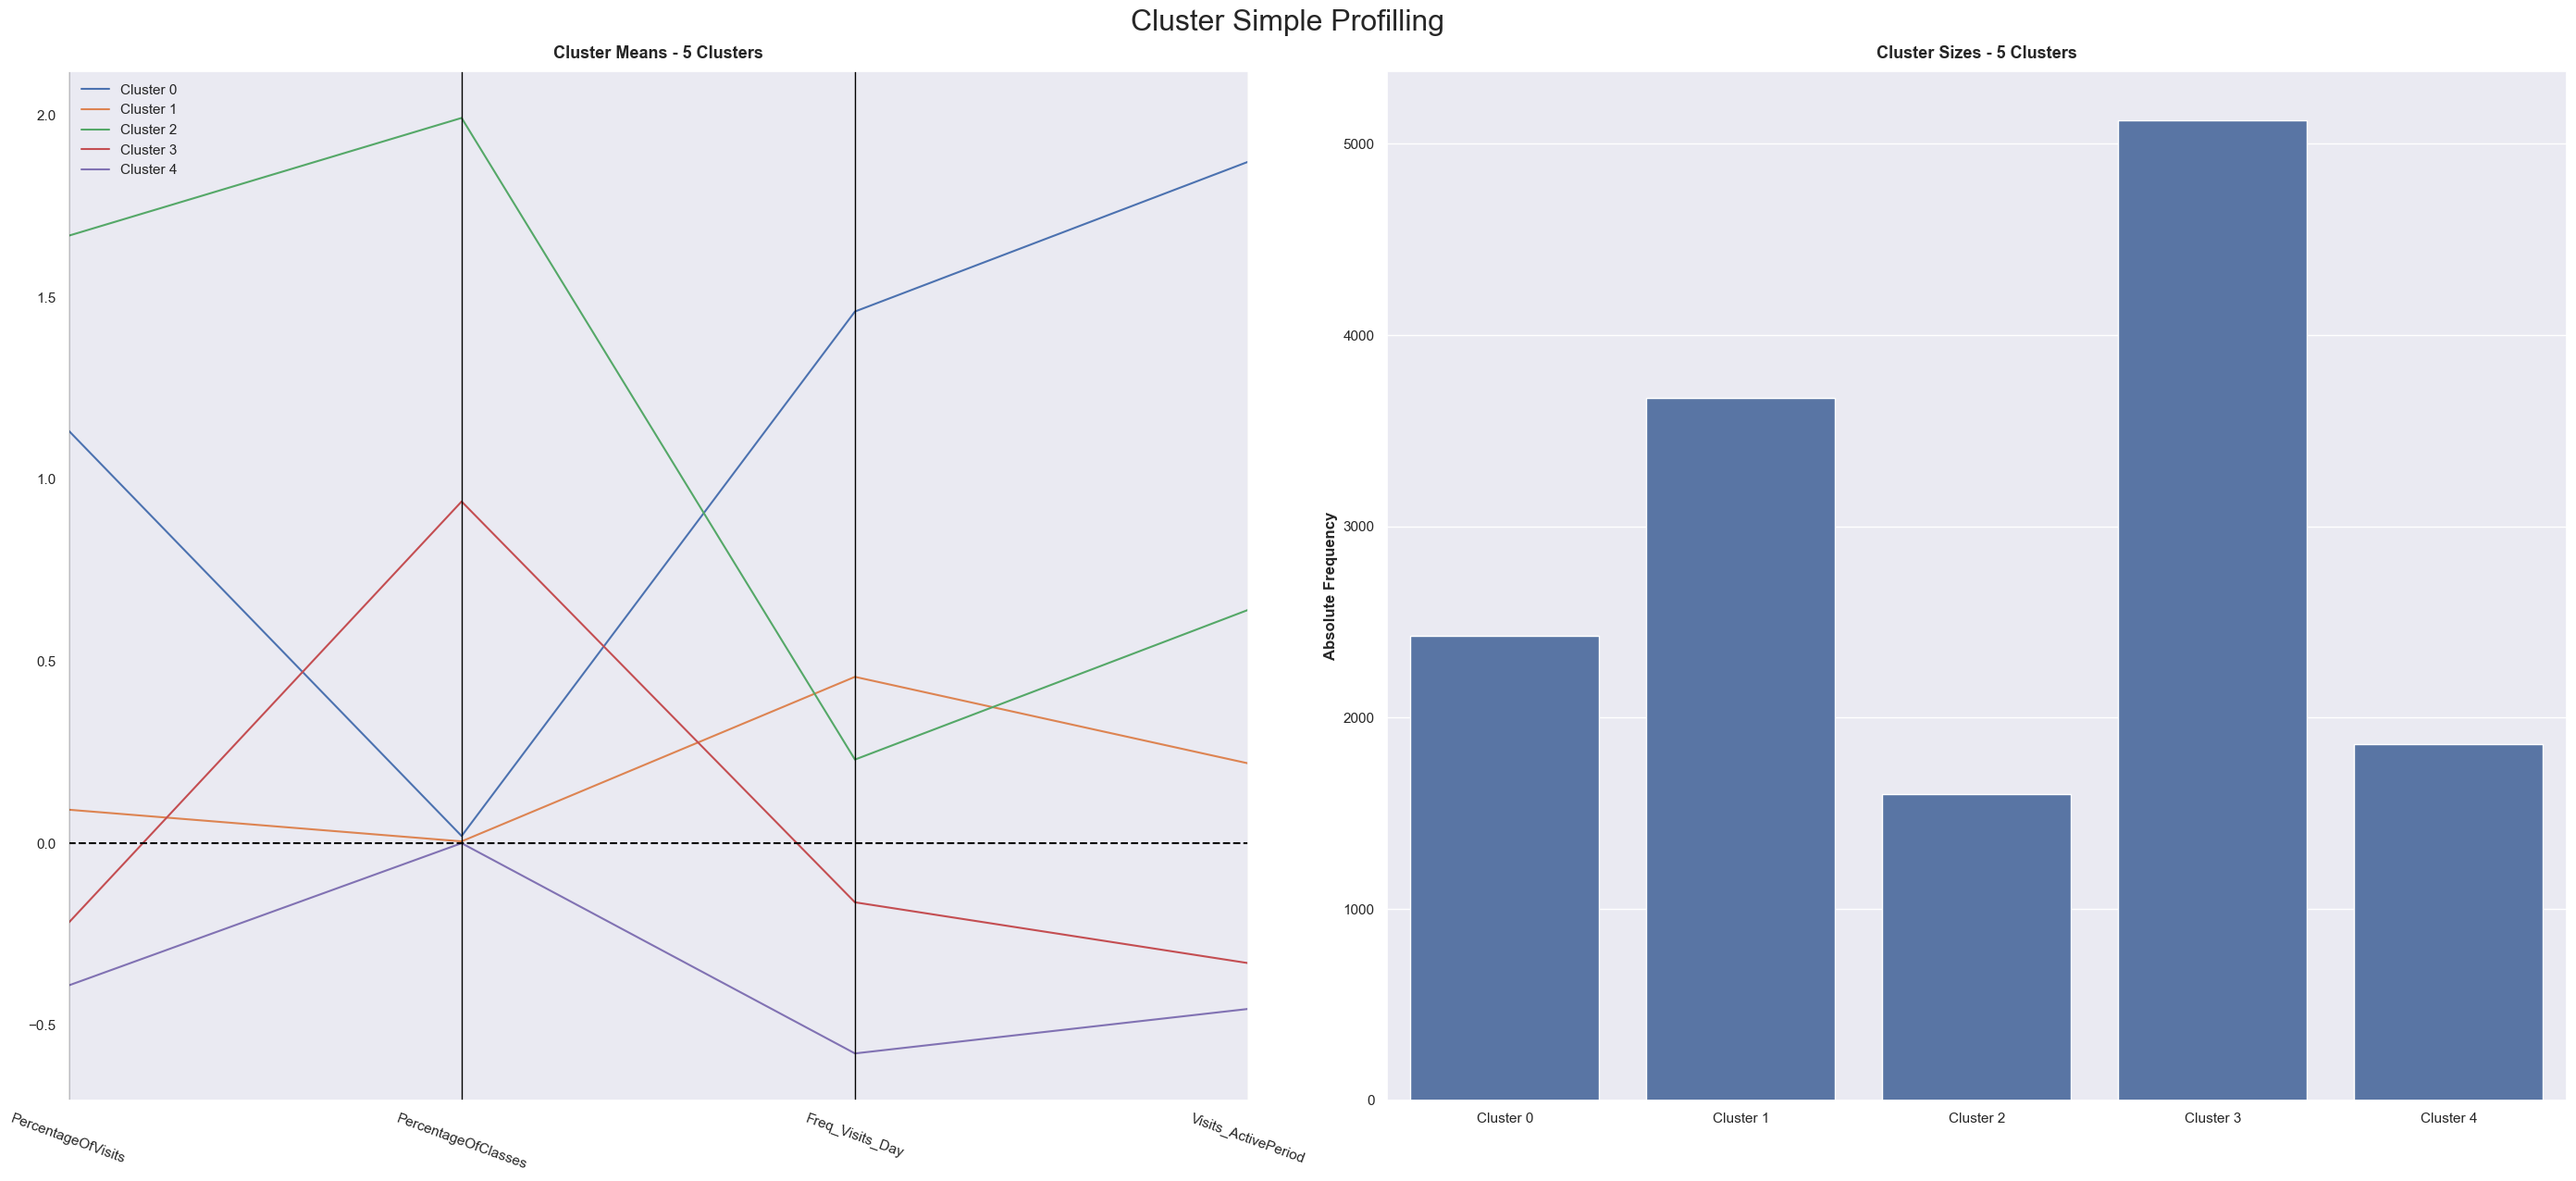

In [28]:
cluster_profiles(
    df = df_final[frequency_perspective + ["label_freq"]], 
    label_columns = ["label_freq"], 
    figsize = (28, 13), 
    compar_titles = [""]
)

### Demographic Perspective

In [29]:
demographic_perspective = ['Age', 'Active_Period', 'MonthlyValue', 'Contract_Duration']
df_demographic = data[demographic_perspective]

In [30]:
np.random.seed(42)

sm_demographic = sompy.SOMFactory().build(
    data[demographic_perspective].values, 
    mapsize=[50, 50], 
    initialization='random',
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=demographic_perspective
)

sm_demographic.train(n_job=-1, verbose='info', train_rough_len=50, train_finetune_len=50)

 Training...
 random_initialization took: 0.000000 seconds
 Rough training...
 radius_ini: 17.000000 , radius_final: 2.833333, trainlen: 50

 epoch: 1 ---> elapsed time:  7.372000, quantization error: 0.653477

 epoch: 2 ---> elapsed time:  7.764000, quantization error: 1.823122

 epoch: 3 ---> elapsed time:  7.081000, quantization error: 1.796397

 epoch: 4 ---> elapsed time:  7.248000, quantization error: 1.792374

 epoch: 5 ---> elapsed time:  7.474000, quantization error: 1.790255

 epoch: 6 ---> elapsed time:  7.133000, quantization error: 1.788063

 epoch: 7 ---> elapsed time:  7.285000, quantization error: 1.785411

 epoch: 8 ---> elapsed time:  6.850000, quantization error: 1.781950

 epoch: 9 ---> elapsed time:  7.003000, quantization error: 1.777600

 epoch: 10 ---> elapsed time:  6.395000, quantization error: 1.773093

 epoch: 11 ---> elapsed time:  7.450000, quantization error: 1.768965

 epoch: 12 ---> elapsed time:  7.557000, quantization error: 1.764819

 epoch: 13 ---> 

In [31]:
range_clusters = range(2, 10)

inertia = []
for n_clus in range_clusters:  
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=20, random_state=1)
    kmclust.fit(data[demographic_perspective])
    inertia.append(kmclust.inertia_)  

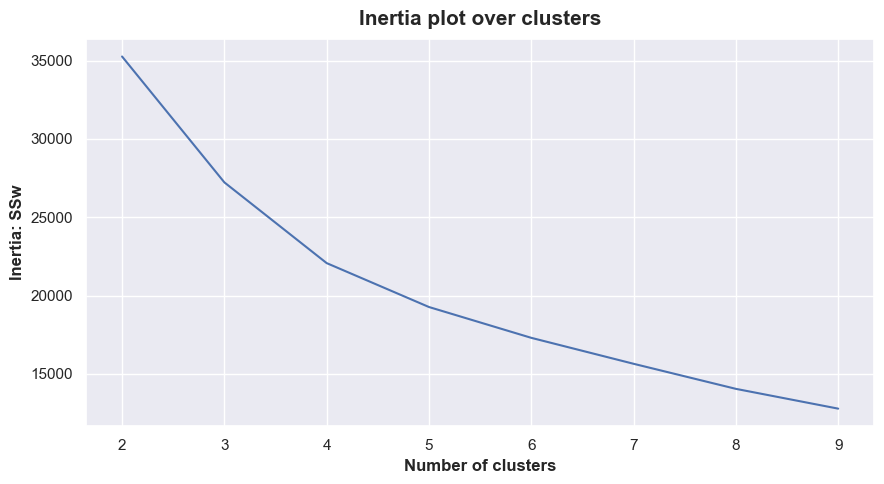

In [32]:
plt.figure(figsize=(9,5))
plt.plot(range_clusters, inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

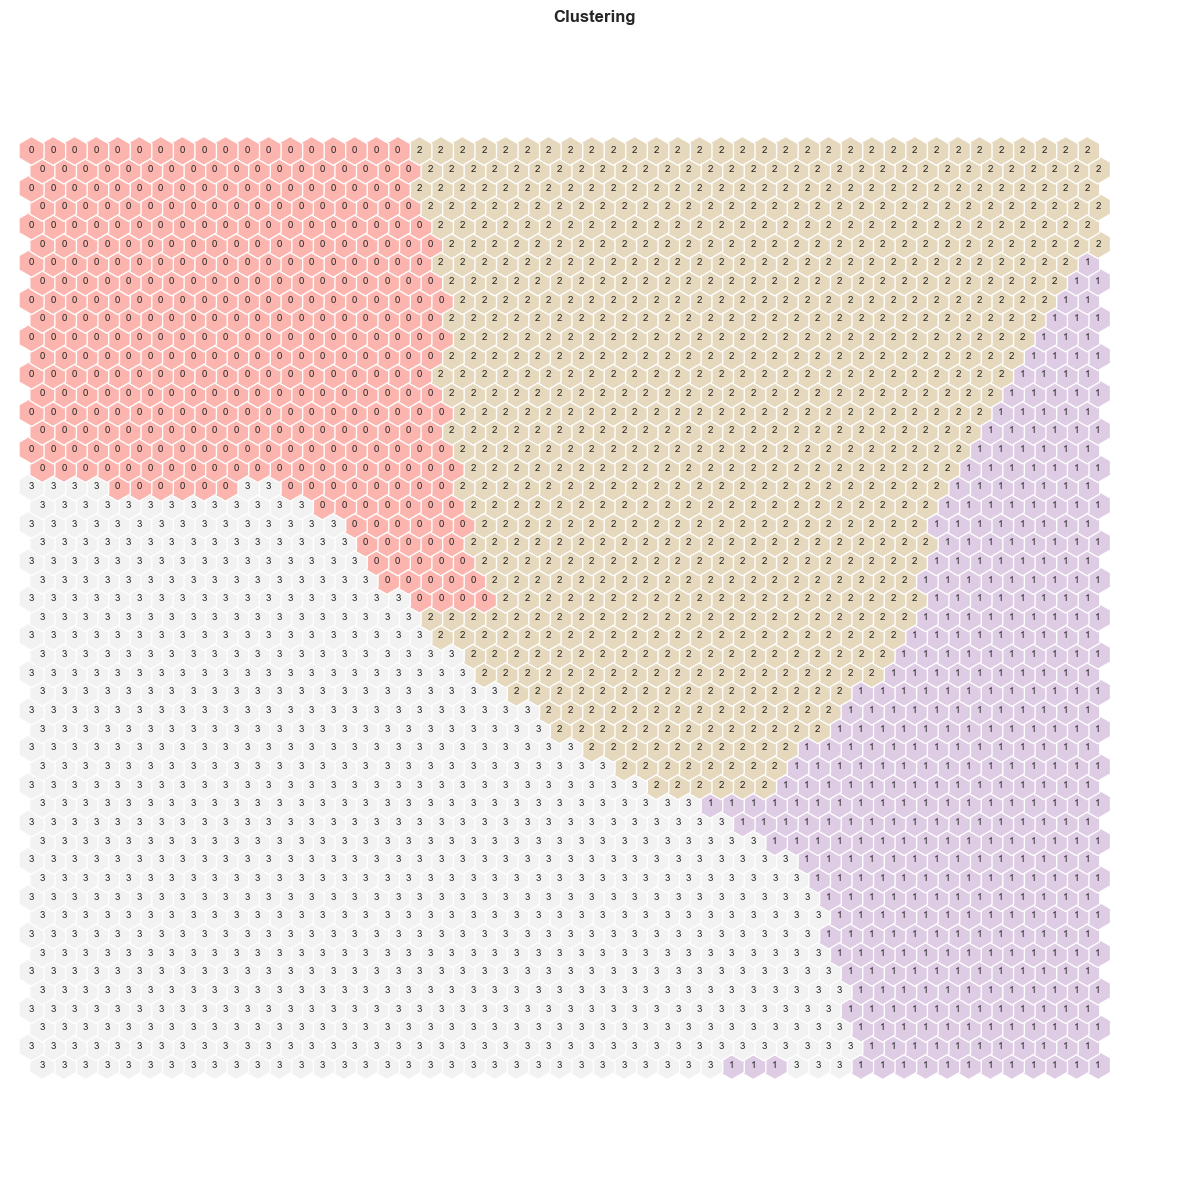

In [33]:
# Perform K-Means clustering on top of the 2500 units (sm.get_node_vectors() output)
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=20, random_state=42)
nodeclus_labels = kmeans.fit_predict(sm_demographic.codebook.matrix)
sm_demographic.cluster_labels = nodeclus_labels  # setting the cluster labels of sompy

hits = HitMapView(12, 12,"Clustering", text_size=10)
hits.show(sm_demographic, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

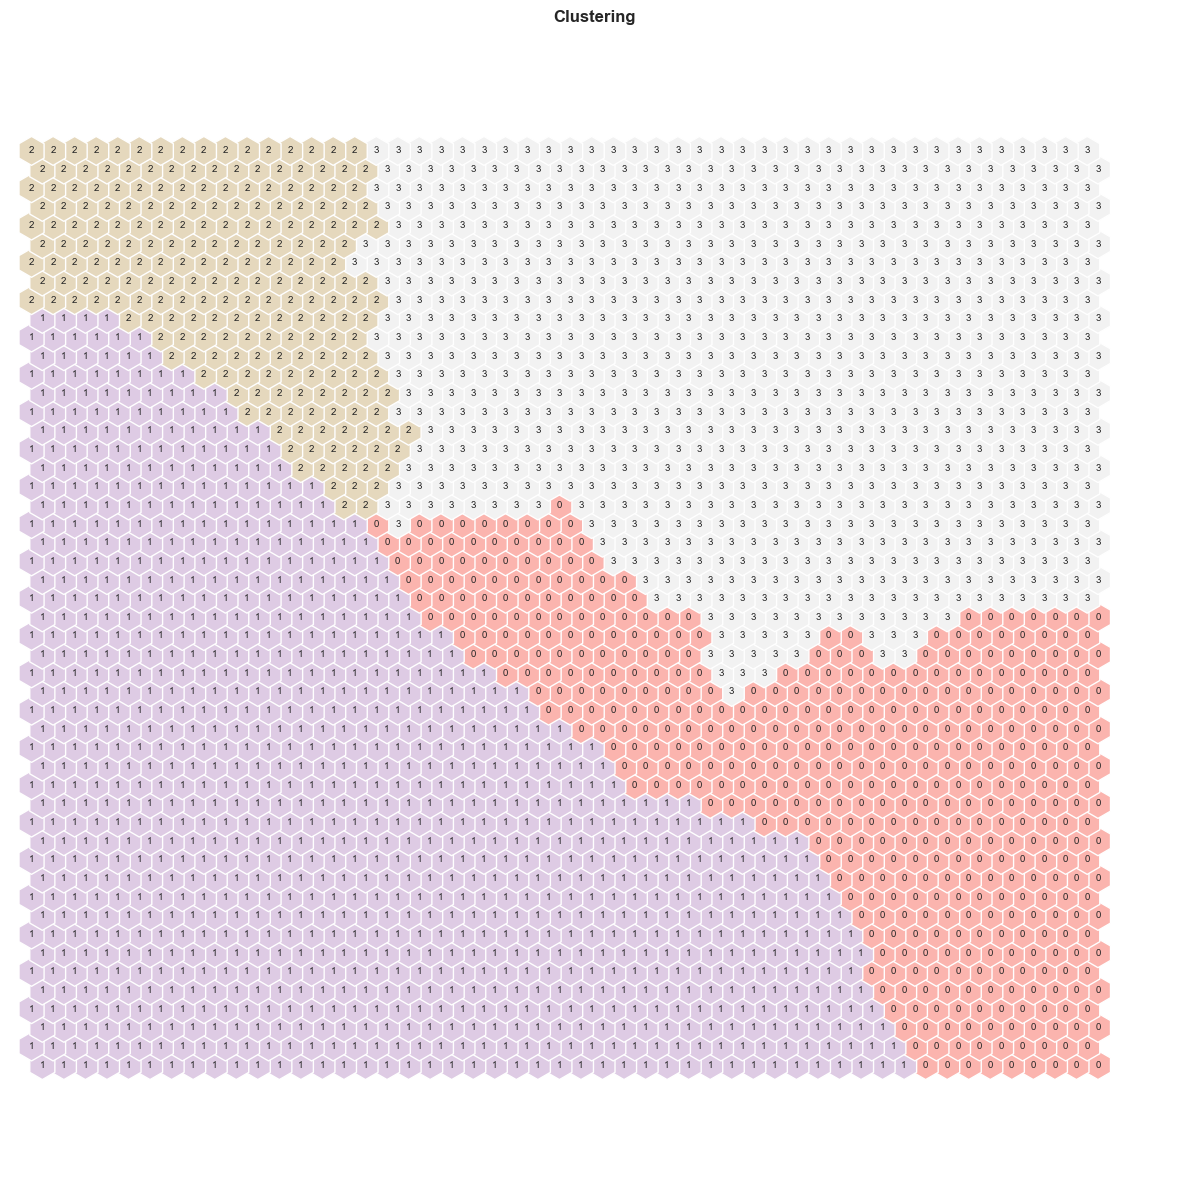

In [34]:
hierclust = AgglomerativeClustering(n_clusters=4, linkage='ward')
nodeclus_labels = hierclust.fit_predict(sm_demographic.codebook.matrix)
sm_demographic.cluster_labels = nodeclus_labels  

hits  = HitMapView(12, 12,"Clustering",text_size=10)
hits.show(sm_demographic, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

In [35]:
nodes = sm_demographic.codebook.matrix

df_nodes = pd.DataFrame(nodes, columns=demographic_perspective)
df_nodes['label_demographic'] = nodeclus_labels
df_nodes

,Age,Active_Period,MonthlyValue,Contract_Duration,label_demographic
0,-1.618947,-0.728054,0.528095,0.107113,3
1,-1.611003,-0.727551,0.399548,-0.013664,3
2,-1.600800,-0.728641,0.258732,-0.175332,3
3,-1.575856,-0.727851,0.112946,-0.303542,3
4,-1.499738,-0.728316,-0.015022,-0.155163,3
...,...,...,...,...,...
2495,-0.908978,1.170259,0.888292,-0.349172,1
2496,-1.047935,1.169110,0.787236,-0.258351,1
2497,-1.272191,1.168262,0.716365,-0.271780,1
2498,-1.466914,1.167794,0.705434,-0.304239,1


In [36]:
bmus_map = sm_demographic.find_bmu(data[demographic_perspective])[0] 
df_bmus_demographic = pd.DataFrame(
    np.concatenate((df_final, np.expand_dims(bmus_map,1)), axis=1),
    index=data.index, columns=np.append(df_final.columns,"BMU_demographic")
)
df_bmus_demographic

,Age,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,TeamActivities,RacketActivities,CombatActivities,SpecialActivities,OtherActivities,...,Contract_Duration,PercentageOfVisits,MonthlyValue,PercentageOfClasses,Freq_Visits_Day,Visits_ActivePeriod,Gender_Female,BMU_freq,label_freq,BMU_demographic
ID,,,,,,,,,,,,,,,,,,,,,
10000,3.083333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.490868,1.15,3.017065,1.866571,0.763419,-0.201465,1.0,957.0,2.0,2050.0
10001,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.285388,-0.20,0.607509,0.104392,-0.204771,-0.501832,1.0,571.0,3.0,2481.0
10002,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.554795,0.50,0.493905,0.000000,1.208748,0.619048,0.0,2270.0,0.0,1056.0
10003,-1.166667,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.257991,0.35,0.176012,0.239981,0.463221,-0.300366,0.0,618.0,3.0,2297.0
10004,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.152968,-0.50,-0.611409,0.000000,-0.255467,-0.600733,0.0,225.0,4.0,1033.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24937,-0.750000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.997717,0.65,0.585080,2.056875,0.190855,1.000000,0.0,1158.0,2.0,35.0
24938,1.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.027397,-0.25,0.756216,0.000000,1.391650,0.007326,0.0,2394.0,1.0,1864.0
24939,-0.250000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.554795,0.85,0.786446,0.000000,1.208748,1.025641,0.0,2216.0,0.0,2111.0


In [37]:
df_final = df_bmus_demographic.merge(df_nodes['label_demographic'], 'left', left_on="BMU_demographic", right_index=True)
df_final

,Age,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,TeamActivities,RacketActivities,CombatActivities,SpecialActivities,OtherActivities,...,PercentageOfVisits,MonthlyValue,PercentageOfClasses,Freq_Visits_Day,Visits_ActivePeriod,Gender_Female,BMU_freq,label_freq,BMU_demographic,label_demographic
ID,,,,,,,,,,,,,,,,,,,,,
10000,3.083333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.15,3.017065,1.866571,0.763419,-0.201465,1.0,957.0,2.0,2050.0,0
10001,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.20,0.607509,0.104392,-0.204771,-0.501832,1.0,571.0,3.0,2481.0,1
10002,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.50,0.493905,0.000000,1.208748,0.619048,0.0,2270.0,0.0,1056.0,3
10003,-1.166667,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.35,0.176012,0.239981,0.463221,-0.300366,0.0,618.0,3.0,2297.0,1
10004,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.50,-0.611409,0.000000,-0.255467,-0.600733,0.0,225.0,4.0,1033.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24937,-0.750000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.65,0.585080,2.056875,0.190855,1.000000,0.0,1158.0,2.0,35.0,2
24938,1.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.25,0.756216,0.000000,1.391650,0.007326,0.0,2394.0,1.0,1864.0,1
24939,-0.250000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.85,0.786446,0.000000,1.208748,1.025641,0.0,2216.0,0.0,2111.0,1


In [38]:
df_final.drop(columns='BMU_demographic').groupby('label_demographic').mean()

,Age,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,TeamActivities,RacketActivities,CombatActivities,SpecialActivities,OtherActivities,...,Active_Period,Contract_Duration,PercentageOfVisits,MonthlyValue,PercentageOfClasses,Freq_Visits_Day,Visits_ActivePeriod,Gender_Female,BMU_freq,label_freq
label_demographic,,,,,,,,,,,,,,,,,,,,,
0,1.215352,0.033262,0.007676,0.257996,0.623881,0.036674,0.016205,0.093817,0.059701,0.002132,...,0.001216,-0.089174,0.384627,0.867954,0.417281,0.596250,0.591704,0.608955,1431.964179,1.666951
1,0.234853,0.041392,0.006749,0.289292,0.537642,0.055339,0.038542,0.124475,0.018746,0.003299,...,0.817418,0.143238,0.153487,0.107916,0.557869,0.284332,0.001064,0.600630,1142.137522,2.185513
2,0.516631,0.135730,0.011803,0.405579,0.576180,0.074034,0.010193,0.109979,0.048283,0.000000,...,0.074043,2.078837,0.447183,-0.417159,0.686147,0.081733,0.606746,0.526288,1171.352468,1.943670
3,-0.445910,0.022572,0.005774,0.260892,0.632546,0.053018,0.008136,0.088714,0.004199,0.000262,...,-0.008529,-0.001735,0.301457,-0.156267,0.547254,0.063158,0.345564,0.623622,1160.789764,1.991601


In [39]:
cluster_means = df_final.groupby('label_demographic').mean()[demographic_perspective].T
cluster_means.style.format(precision=2).background_gradient(axis=1)

label_demographic,0,1,2,3
Age,1.22,0.23,0.52,-0.45
Active_Period,0.00,0.82,0.07,-0.01
MonthlyValue,0.87,0.11,-0.42,-0.16
Contract_Duration,-0.09,0.14,2.08,-0.00


Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


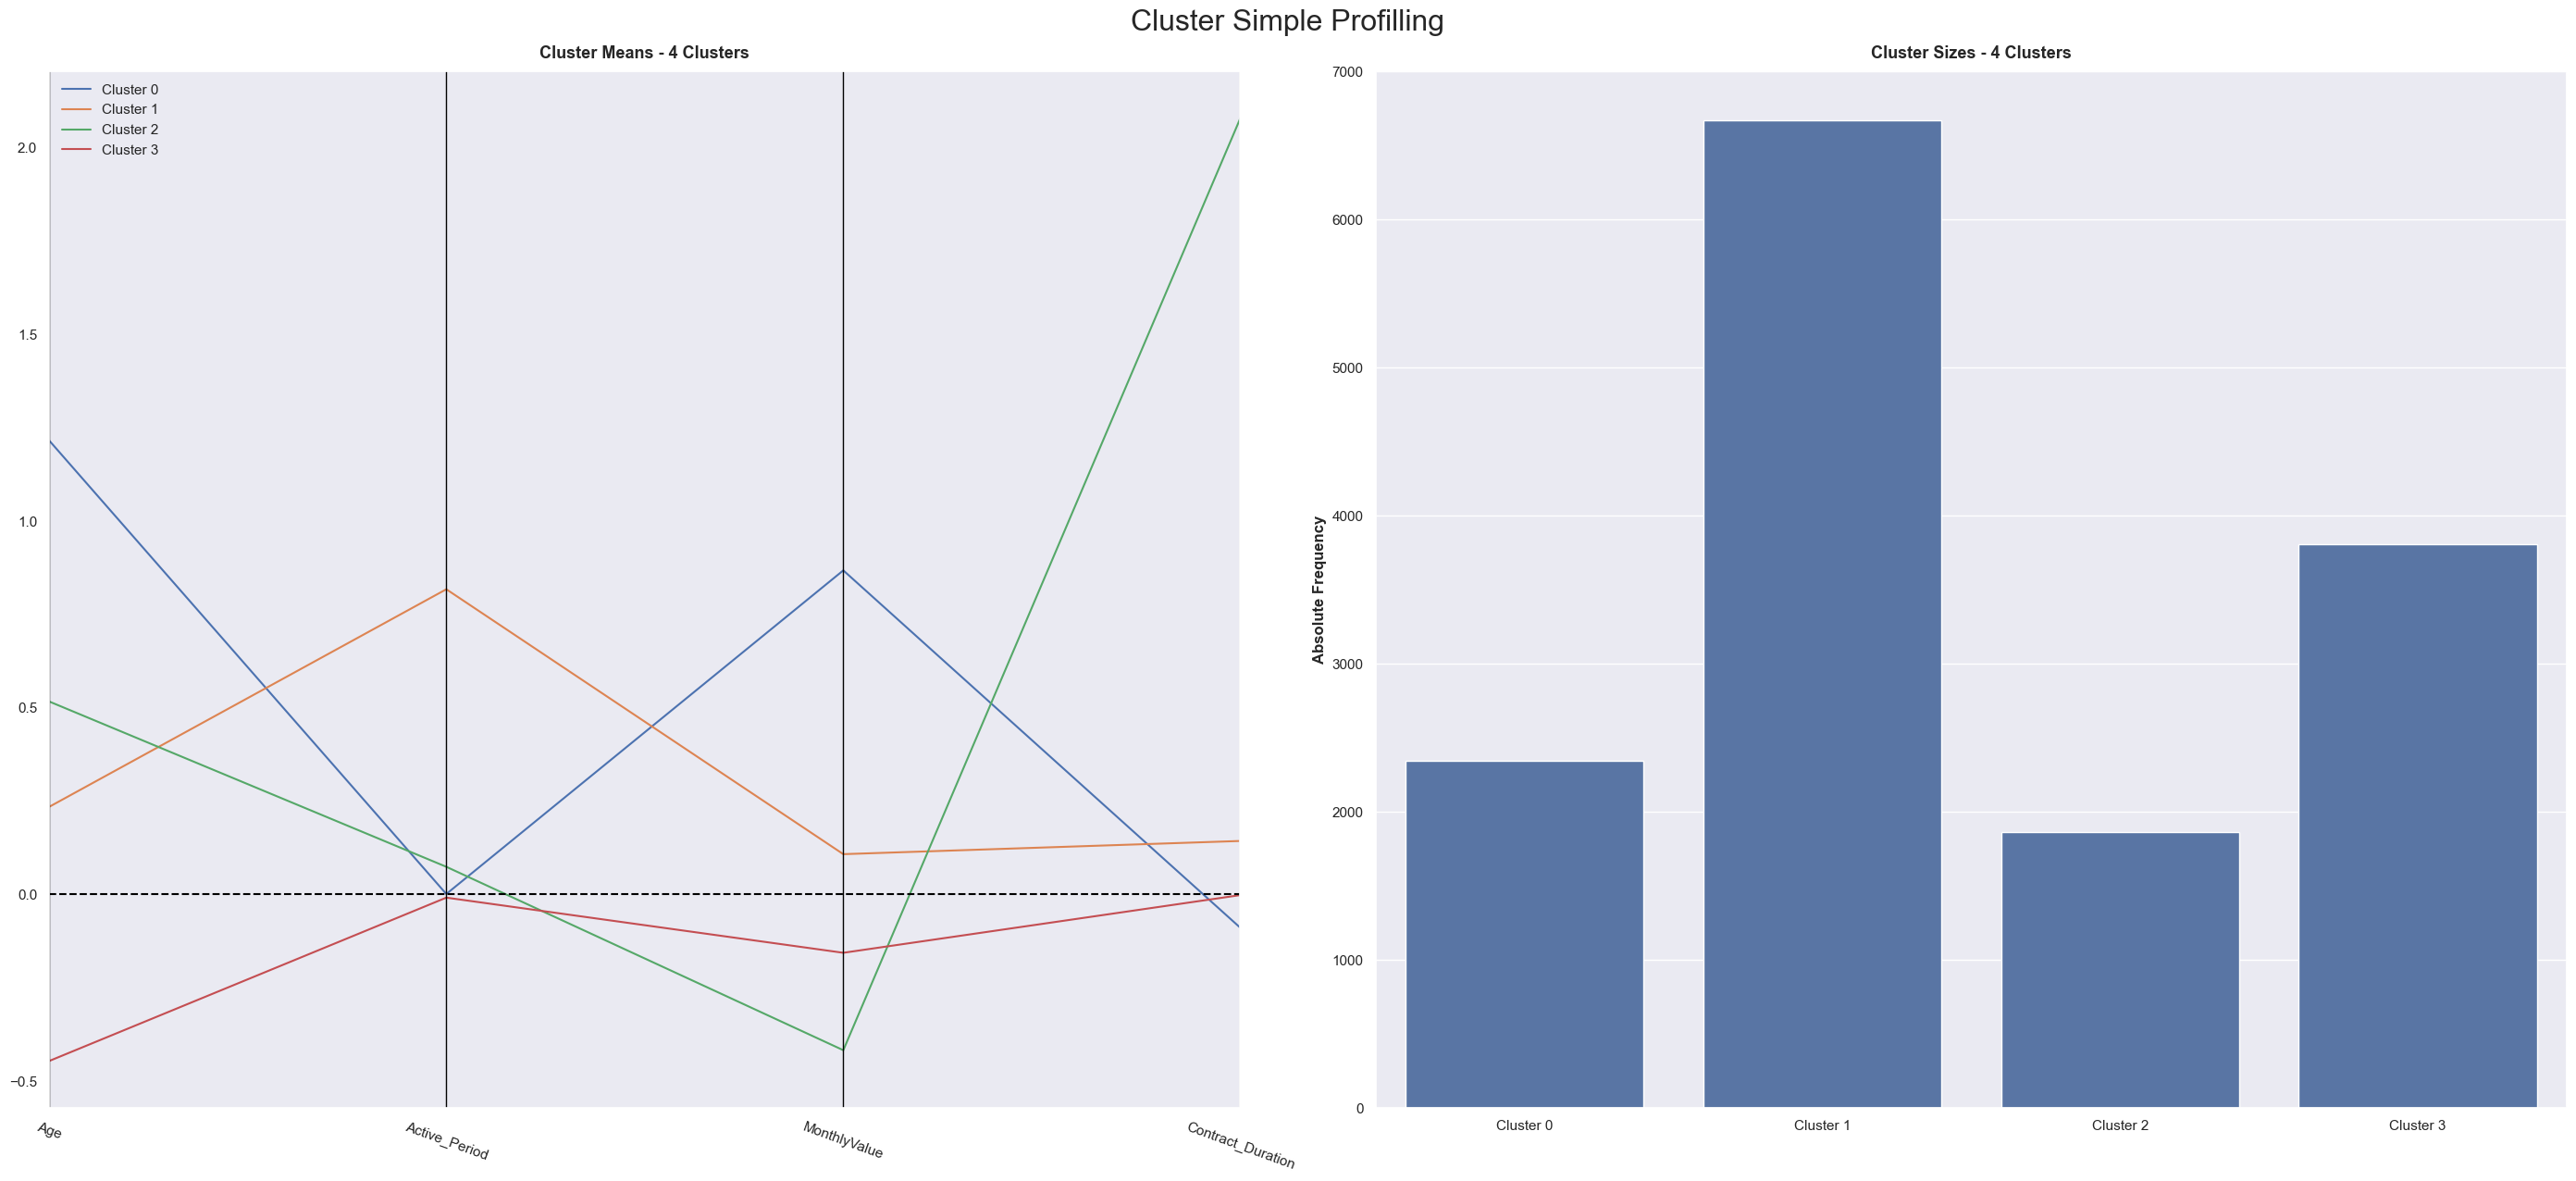

In [40]:
cluster_profiles(
    df = df_final[demographic_perspective + ["label_demographic"]], 
    label_columns = ["label_demographic"], 
    figsize = (28, 13), 
    compar_titles = [""]
)

### Merge Perspectives

In [41]:
metric_features = ['Age','Contract_Duration', 'PercentageOfVisits', 'PercentageOfClasses',
       'Freq_Visits_Day', 'Visits_ActivePeriod']

In [42]:
pd.crosstab(df_final['label_freq'],
            df_final['label_demographic'])

label_demographic,0,1,2,3
label_freq,,,,
0.0,623,889,343,574
1.0,625,1559,426,1063
2.0,242,522,338,496
3.0,620,2822,507,1175
4.0,235,876,250,502


In [43]:
df_centroids = df_final.groupby(['label_freq', 'label_demographic'])\
    [metric_features].mean()


# Clusters with low frequency to be merged:
to_merge = [(2,3), (2,2), (2,1), (3,3)]


# Computing the euclidean distance matrix between the centroids
euclidean = pairwise_distances(df_centroids)
df_dists = pd.DataFrame(
    euclidean, columns=df_centroids.index, index=df_centroids.index
)

# Merging each low frequency clustering (source) to the closest cluster (target)
source_target = {}
for clus in to_merge:
    if clus not in source_target.values():
        source_target[clus] = df_dists.loc[clus].sort_values().index[1]

source_target

{(2, 3): (2.0, 1), (2, 2): (2.0, 1), (3, 3): (3.0, 1)}

In [44]:
df_ = df_final.copy()

for source, target in source_target.items():
    mask = (df_['label_freq']==source[0]) & (df_['label_demographic']==source[1])
    df_.loc[mask, 'label_freq'] = target[0]
    df_.loc[mask, 'label_demographic'] = target[1]


pd.crosstab(df_['label_freq'],
            df_['label_demographic'])

df = df_.copy()

## Merging using Hierarchical clustering:

In [45]:
# Centroids of the concatenated cluster labels
df_centroids = df.groupby(['label_demographic', 'label_freq'])\
    [metric_features].mean()
df_centroids

Age  Contract_Duration  PercentageOfVisits  \
label_demographic label_freq                                                    
0                 0.0         1.322632          -0.068097            1.148154   
                  1.0         1.249600          -0.052296            0.012800   
                  2.0         0.515840          -0.144751            1.773967   
                  3.0         1.249462          -0.136022           -0.242742   
                  4.0         1.470213          -0.062304           -0.426170   
1                 0.0         0.447600           0.027567            1.123678   
                  1.0         0.369735           0.053346            0.050353   
                  2.0        -0.621989           0.873599            1.650037   
                  3.0        -0.115941           0.131462           -0.218401   
                  4.0         0.471556           0.160362           -0.421290   
2                 0.0         1.094995           2.144787            1.189213   
                  1.0         0.845070           1.905862            0.140845   
                  3.0         0.427679           2.102447           -0.200592   
                  4.0         0.588667           1.795799           -0.349800   
3                 0.0        -0.137776          -0.082176            1.104530   
                  1.0        -0.155613          -0.101715            0.180621   
                  4.0        -0.210325          -0.083479           -0.342829   

                              PercentageOfClasses  Freq_Visits_Day  \
label_demographic label_freq                                         
0                 0.0                    0.030884         1.813185   
                  1.0                    0.006927         0.585212   
                  2.0                    1.955544         0.550417   
                  3.0                    0.776956        -0.162002   
                  4.0                    0.000000        -0.552870   
1                 0.0                    0.016176         1.762391   
                  1.0                    0.005062         0.678828   
                  2.0                    1.999396         0.172674   
                  3.0                    0.933660        -0.164970   
                  4.0                    0.000000        -0.564442   
2                 0.0                    0.023198         0.921338   
                  1.0                    0.008624         0.100204   
                  3.0                    1.177857        -0.141904   
                  4.0                    0.000480        -0.614398   
3                 0.0                    0.011662         0.933904   
                  1.0                    0.002802         0.199710   
                  4.0                    0.000000        -0.593564   

                              Visits_ActivePeriod  
label_demographic label_freq                       
0                 0.0                    2.132386  
                  1.0                    0.221128  
                  2.0                    0.856204  
                  3.0                   -0.275706  
                  4.0                   -0.491061  
1                 0.0                    1.459009  
                  1.0                    0.067353  
                  2.0                    0.602888  
                  3.0                   -0.343169  
                  4.0                   -0.514610  
2                 0.0                    2.625327  
                  1.0                    0.376387  
                  3.0                   -0.287188  
                  4.0                   -0.351502  
3                 0.0                    1.780941  
                  1.0                    0.378206  
                  4.0                   -0.386666

In [46]:
#use Hierarchical clustering to merge the concatenated cluster centroids
linkage = 'ward'
hclust = AgglomerativeClustering(
    linkage=linkage, 
    metric='euclidean', 
    distance_threshold=0, 
    n_clusters=None
)
hclust_labels = hclust.fit_predict(df_centroids)

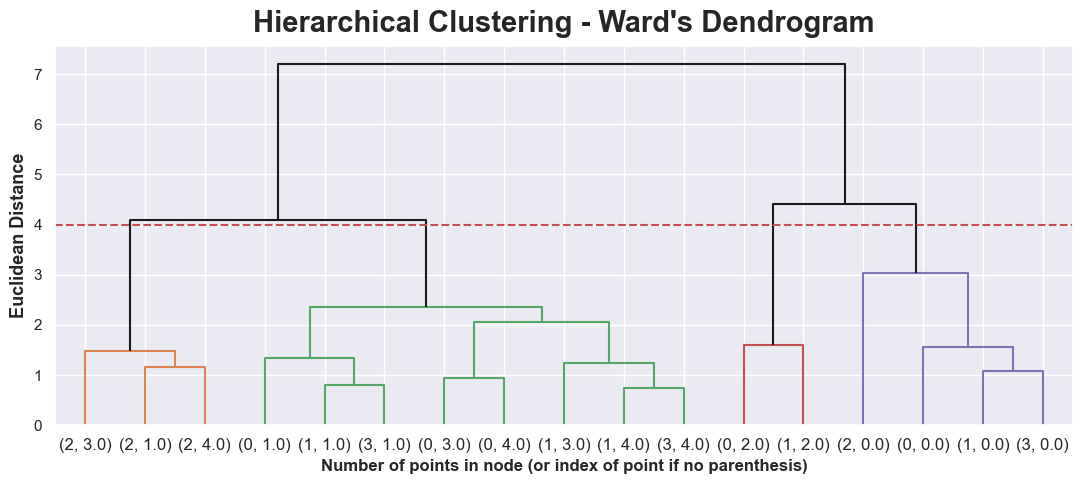

In [47]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 4
dendrogram(linkage_matrix, 
           truncate_mode='level', 
           labels=df_centroids.index, p=5, 
           color_threshold=y_threshold, 
           above_threshold_color='k')

plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'Euclidean Distance', fontsize=13)
plt.show()

In [48]:
hclust = AgglomerativeClustering(
    linkage='ward', 
    metric='euclidean', 
    n_clusters=3
)
hclust_labels = hclust.fit_predict(df_centroids)
df_centroids['hclust_labels'] = hclust_labels

df_centroids 

Age  Contract_Duration  PercentageOfVisits  \
label_demographic label_freq                                                    
0                 0.0         1.322632          -0.068097            1.148154   
                  1.0         1.249600          -0.052296            0.012800   
                  2.0         0.515840          -0.144751            1.773967   
                  3.0         1.249462          -0.136022           -0.242742   
                  4.0         1.470213          -0.062304           -0.426170   
1                 0.0         0.447600           0.027567            1.123678   
                  1.0         0.369735           0.053346            0.050353   
                  2.0        -0.621989           0.873599            1.650037   
                  3.0        -0.115941           0.131462           -0.218401   
                  4.0         0.471556           0.160362           -0.421290   
2                 0.0         1.094995           2.144787            1.189213   
                  1.0         0.845070           1.905862            0.140845   
                  3.0         0.427679           2.102447           -0.200592   
                  4.0         0.588667           1.795799           -0.349800   
3                 0.0        -0.137776          -0.082176            1.104530   
                  1.0        -0.155613          -0.101715            0.180621   
                  4.0        -0.210325          -0.083479           -0.342829   

                              PercentageOfClasses  Freq_Visits_Day  \
label_demographic label_freq                                         
0                 0.0                    0.030884         1.813185   
                  1.0                    0.006927         0.585212   
                  2.0                    1.955544         0.550417   
                  3.0                    0.776956        -0.162002   
                  4.0                    0.000000        -0.552870   
1                 0.0                    0.016176         1.762391   
                  1.0                    0.005062         0.678828   
                  2.0                    1.999396         0.172674   
                  3.0                    0.933660        -0.164970   
                  4.0                    0.000000        -0.564442   
2                 0.0                    0.023198         0.921338   
                  1.0                    0.008624         0.100204   
                  3.0                    1.177857        -0.141904   
                  4.0                    0.000480        -0.614398   
3                 0.0                    0.011662         0.933904   
                  1.0                    0.002802         0.199710   
                  4.0                    0.000000        -0.593564   

                              Visits_ActivePeriod  hclust_labels  
label_demographic label_freq                                      
0                 0.0                    2.132386              1  
                  1.0                    0.221128              0  
                  2.0                    0.856204              2  
                  3.0                   -0.275706              0  
                  4.0                   -0.491061              0  
1                 0.0                    1.459009              1  
                  1.0                    0.067353              0  
                  2.0                    0.602888              2  
                  3.0                   -0.343169              0  
                  4.0                   -0.514610              0  
2                 0.0                    2.625327              1  
                  1.0                    0.376387              0  
                  3.0                   -0.287188              0  
                  4.0                   -0.351502              0  
3                 0.0                    1.780941              1  
                  1.0    

In [49]:
cluster_mapper = df_centroids['hclust_labels'].to_dict()

df_ = df.copy()

# Mapping the hierarchical clusters on the centroids to the observations
df_['merged_labels'] = df_.apply(
    lambda row: cluster_mapper[
        (row['label_demographic'], row['label_freq'])
    ], axis=1
)

# Merged cluster centroids
df_.groupby('merged_labels')[metric_features].mean()

,Age,Contract_Duration,PercentageOfVisits,PercentageOfClasses,Freq_Visits_Day,Visits_ActivePeriod
merged_labels,,,,,,
0,0.270192,0.262120,-0.142158,0.453069,-0.021453,-0.162363
1,0.625120,0.276071,1.134685,0.019873,1.460872,1.872492
2,-0.449677,0.719381,1.668805,1.992755,0.229879,0.641250


In [50]:
df_counts = df_.groupby('merged_labels')\
    .size()\
    .to_frame()

df_counts = df_counts\
    .rename({v:k for k, v in cluster_mapper.items()})\
    .reset_index()

df_counts['label_demographic'] = df_counts['merged_labels'].apply(lambda x: x[0])
df_counts['label_freq'] = df_counts['merged_labels'].apply(lambda x: x[1])

df_counts.pivot(values=0, index='label_demographic', columns='label_freq')

label_freq,0.0,2.0,4.0
label_demographic,,,
1,NaN,1598.0,NaN
3,2429.0,NaN,10660.0


In [51]:
df = df_.copy()

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings 

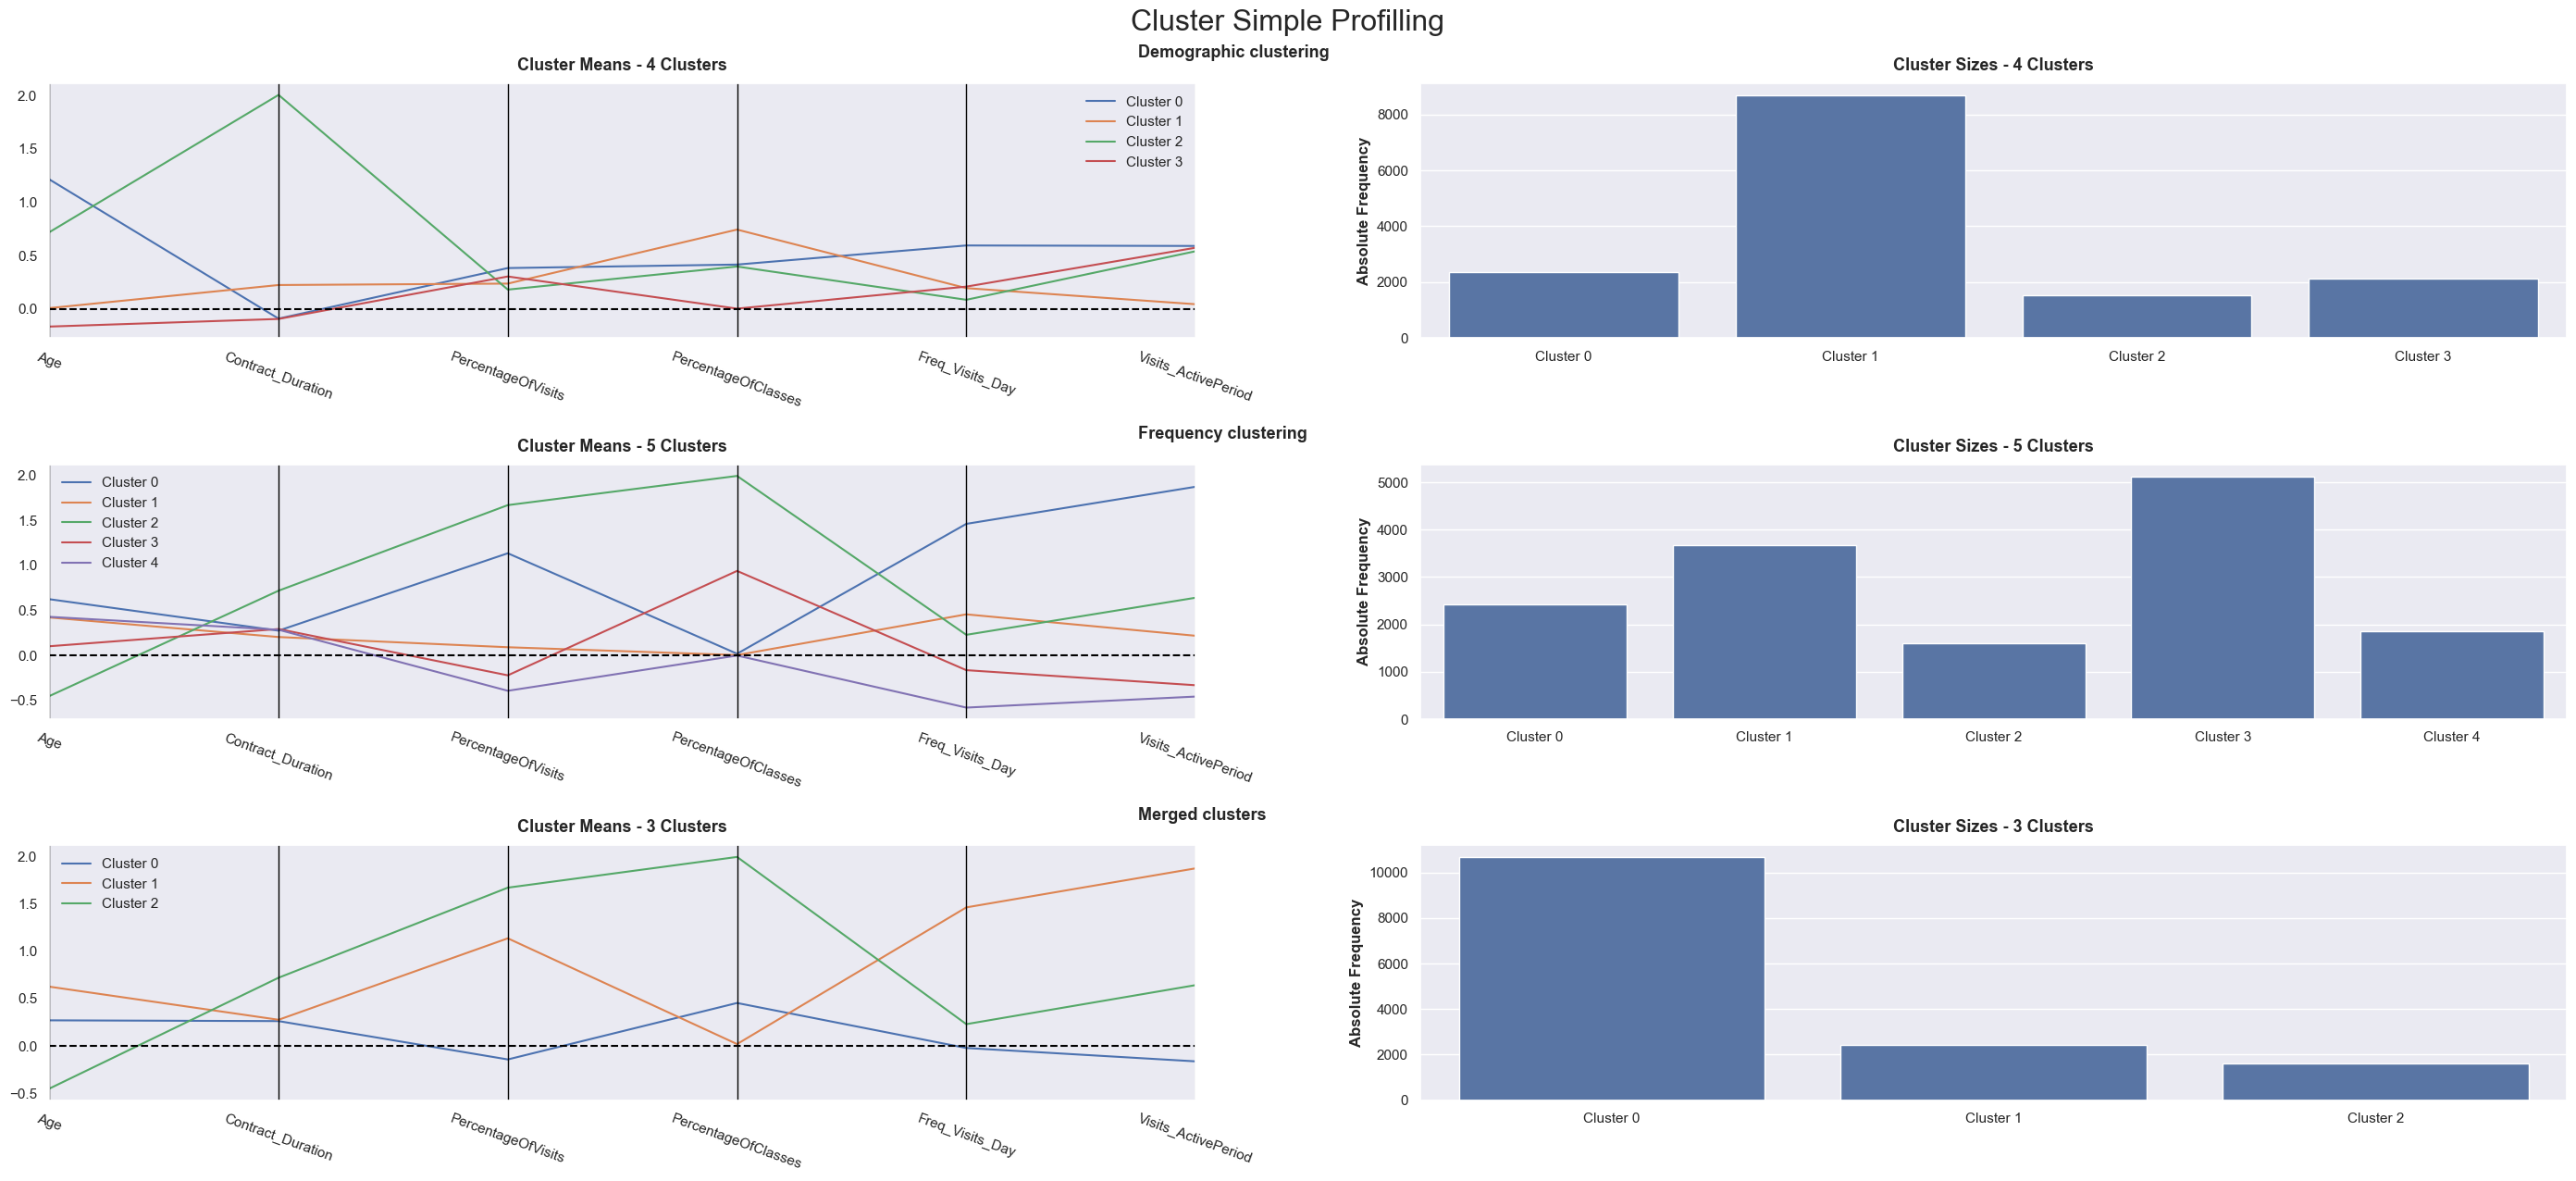

In [52]:
# Profilling each cluster (product, behavior, merged)
cluster_profiles(
    df = df[metric_features + ['label_demographic', 'label_freq', 'merged_labels']], 
    label_columns = ['label_demographic', 'label_freq', 'merged_labels'], 
    figsize = (28, 13), 
    compar_titles = ["Demographic clustering", "Frequency clustering", "Merged clusters"])

In [53]:
sst = get_ss(df[metric_features])  
ssw_labels = df[metric_features+ ["merged_labels"]].groupby(by='merged_labels').apply(get_ss) 
ssb = sst - np.sum(ssw_labels)
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.2974


In [54]:
df_study= df[["merged_labels"] + metric_features].groupby(["merged_labels"]).sum()

In [55]:
df_study[metric_features].apply(lambda col: col/(col.sum())).style.format(precision=2).background_gradient(axis=0)

,Age,Contract_Duration,PercentageOfVisits,PercentageOfClasses,Freq_Visits_Day,Visits_ActivePeriod
merged_labels,,,,,,
0,0.78,0.61,-0.39,0.60,-0.06,-0.45
1,0.41,0.15,0.71,0.01,0.96,1.18
2,-0.20,0.25,0.68,0.39,0.10,0.27


In [56]:
df_study= df[["merged_labels"] + activities].groupby(["merged_labels"]).sum()

In [57]:
df_study[activities].apply(lambda col: col/(col.sum())).style.format(precision=2).background_gradient(axis=0)

,AthleticsActivities,WaterActivities,FitnessActivities,TeamActivities,RacketActivities,CombatActivities,SpecialActivities,OtherActivities
merged_labels,,,,,,,,
0,0.79,0.63,0.75,0.81,0.61,0.88,0.53,0.79
1,0.17,0.09,0.23,0.04,0.01,0.08,0.36,0.04
2,0.04,0.29,0.02,0.15,0.38,0.04,0.11,0.18


In [58]:
df_study= df[["merged_labels"] + compare].groupby(["merged_labels"]).sum()

In [59]:
df_study[compare].apply(lambda col: col/(col.sum())).style.format(precision=2).background_gradient(axis=0)

,Dropout,Gender_Female,UseByTime
merged_labels,,,
0,0.79,0.74,0.71
1,0.15,0.15,0.25
2,0.06,0.10,0.04


## Gaussian Mixture Model:

#### Frequency studies:

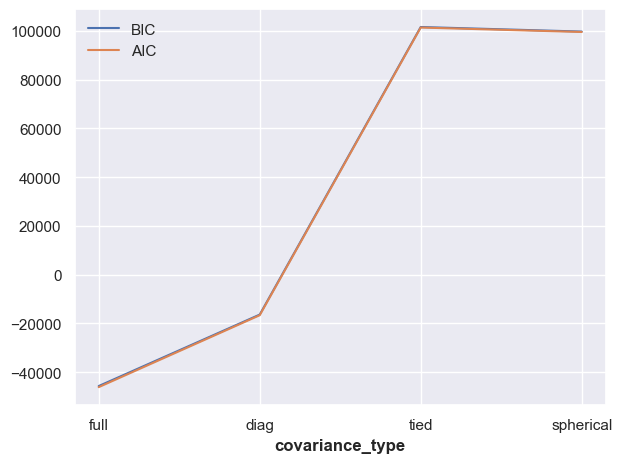

In [63]:
# Selecting covariance type based on AIC and BIC
cov_type = ['full','diag', 'tied', 'spherical']
models = [GaussianMixture(n_components=4, covariance_type=t, n_init=10, random_state=1).fit(df_frequency)
          for t in cov_type]

# TO-DO: compute the aic and bic values for each cluster solution. Use the appropriate GMM methods.
bic_values = [gmm.bic(df_frequency) for gmm in models]
aic_values = [gmm.aic(df_frequency) for gmm in models]
plt.plot(cov_type, bic_values, label='BIC')
plt.plot(cov_type, aic_values, label='AIC')
plt.legend(loc='best')
plt.xlabel('covariance_type')
plt.xticks(cov_type)
plt.show()

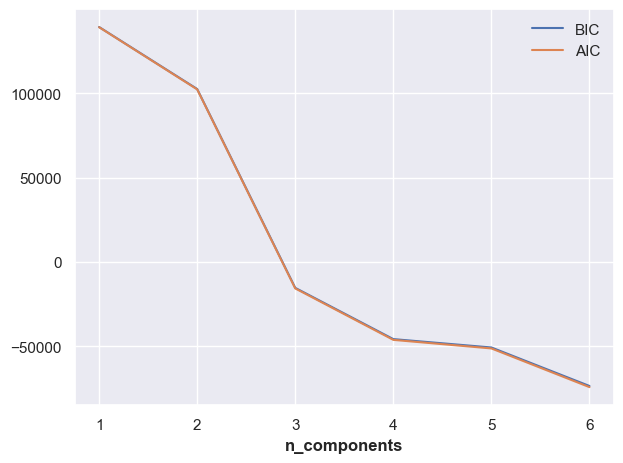

In [65]:
# Selecting number of components based on AIC and BIC
n_components = np.arange(1, 7)
models = [GaussianMixture(n, covariance_type='full', n_init=10, random_state=1).fit(df_frequency)
          for n in n_components]

# TO-DO: compute the aic and bic values for each cluster solution. Use the appropriate GMM methods.
bic_values = [gmm.bic(df_frequency) for gmm in models]
aic_values = [gmm.aic(df_frequency) for gmm in models]
plt.plot(n_components, bic_values, label='BIC')
plt.plot(n_components, aic_values, label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.xticks(n_components)
plt.show()

In [85]:
gmm = GaussianMixture(n_components=4, covariance_type='diag', n_init=10, init_params='k-means++', random_state=1, max_iter=3000, reg_covar=10**-3, tol = 10**-5)
freq_labels = gmm.fit_predict(df_frequency)
labels_proba = gmm.predict_proba(df_frequency)
freq_labels

array([1, 3, 2, ..., 2, 1, 2])

In [86]:
c= Counter(freq_labels)
c

Counter({3: 5683, 2: 3507, 1: 3044, 0: 2453})

In [89]:
counter = []
for n in range(0,4):
    counter.append(round(c[n]/df_frequency.shape[0],4))
counter

[0.167, 0.2073, 0.2388, 0.3869]

In [113]:
freq = pd.concat([data, pd.Series(freq_labels, index=data.index, name="freq_labels")], axis=1)

In [114]:
def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

sst = get_ss(freq[frequency_perspective])  # get total sum of squares
ssw_labels = freq[frequency_perspective + ["freq_labels"]].groupby(by='freq_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.5001


### Demographic Prespective:

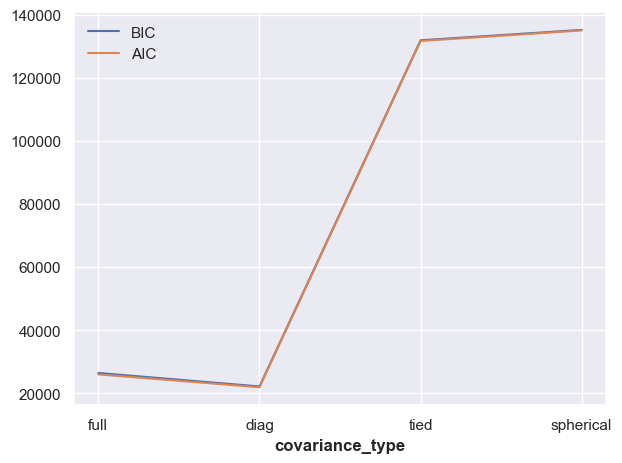

In [71]:
# Selecting covariance type based on AIC and BIC
cov_type = ['full','diag', 'tied', 'spherical']
models = [GaussianMixture(n_components=4, covariance_type=t, n_init=10, random_state=1).fit(df_demographic)
          for t in cov_type]

# TO-DO: compute the aic and bic values for each cluster solution. Use the appropriate GMM methods.
bic_values = [gmm.bic(df_demographic) for gmm in models]
aic_values = [gmm.aic(df_demographic) for gmm in models]
plt.plot(cov_type, bic_values, label='BIC')
plt.plot(cov_type, aic_values, label='AIC')
plt.legend(loc='best')
plt.xlabel('covariance_type')
plt.xticks(cov_type)
plt.show()

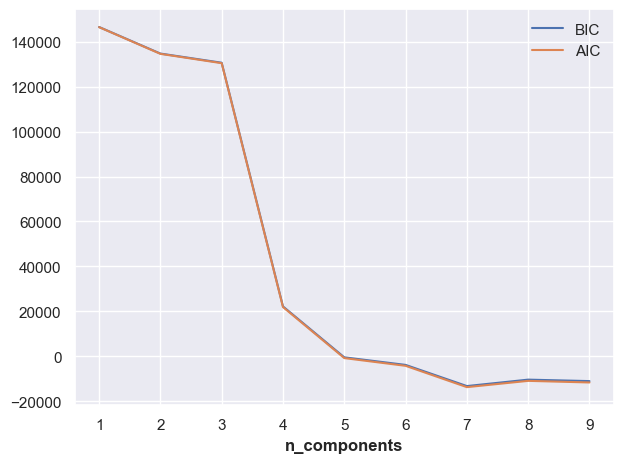

In [72]:
# Selecting number of components based on AIC and BIC
n_components = np.arange(1, 10)
models = [GaussianMixture(n, covariance_type='diag', n_init=10, random_state=1).fit(df_demographic)
          for n in n_components]

# TO-DO: compute the aic and bic values for each cluster solution. Use the appropriate GMM methods.
bic_values = [gmm.bic(df_demographic) for gmm in models]
aic_values = [gmm.aic(df_demographic) for gmm in models]
plt.plot(n_components, bic_values, label='BIC')
plt.plot(n_components, aic_values, label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.xticks(n_components)
plt.show()

In [73]:
gmm = GaussianMixture(n_components=5, covariance_type='diag', n_init=10, init_params='k-means++', random_state=1, max_iter=3000, tol = 10**-4, reg_covar=10**-2)
dem_labels = gmm.fit_predict(df_demographic)
labels_proba = gmm.predict_proba(df_demographic)
dem_labels

array([0, 4, 0, ..., 0, 2, 2])

In [74]:
c= Counter(dem_labels)
c

Counter({4: 4798, 2: 3338, 0: 3005, 1: 2873, 3: 673})

In [75]:
counter = []
for n in range(0,5):
    counter.append(round(c[n]/df_demographic.shape[0],4))
counter

[0.2046, 0.1956, 0.2273, 0.0458, 0.3267]

In [76]:
dem = pd.concat([data, pd.Series(dem_labels, index=data.index, name="dem_labels")], axis=1)

In [77]:
sst = get_ss(dem[demographic_perspective])  # get total sum of squares
ssw_labels = dem[demographic_perspective+ ["dem_labels"]].groupby(by='dem_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.3276


## Merging Prespectives:

In [115]:
data['freq_labels'] = freq_labels
data['dem_labels'] = dem_labels

In [116]:
pd.crosstab(data['freq_labels'],
            data['dem_labels'])

dem_labels,0,1,2,3,4
freq_labels,,,,,
0,271,348,617,169,1048
1,576,139,1116,208,1005
2,907,943,817,96,744
3,1251,1443,788,200,2001


### Merging using Hierarchical clustering:

In [117]:
# Centroids of the concatenated cluster labels
df_centroids = data.groupby(['dem_labels', 'freq_labels'])\
    [metric_features].mean()
df_centroids

Age  Contract_Duration  PercentageOfVisits  \
dem_labels freq_labels                                                    
0          0            0.658672          -0.309887           -0.500000   
           1           -0.393953          -0.393962            0.959635   
           2            0.475928          -0.466536            0.881422   
           3            0.438916          -0.452613           -0.151719   
1          0           -0.085728           0.048536           -0.500000   
           1           -0.078537           0.076443            0.591727   
           2           -0.047367           0.027995            0.888706   
           3           -0.081543          -0.019056           -0.102322   
2          0            0.588736           1.107239           -0.500000   
           1           -0.498805           1.375610            1.099373   
           2            1.248980           1.382807            0.952326   
           3            1.019141           1.276586           -0.143909   
3          0            0.335306           1.701319           -0.498225   
           1           -0.325321           1.957982            0.581971   
           2            0.736111           2.185930            1.034375   
           3            0.667083           1.952283           -0.128500   
4          0            0.253340           0.120741           -0.500000   
           1           -0.121559           0.183219            0.847811   
           2            0.475806           0.012391            0.863172   
           3            0.315009          -0.040399           -0.190805   

                        PercentageOfClasses  Freq_Visits_Day  \
dem_labels freq_labels                                         
0          0                       0.583391        -0.372180   
           1                       1.900804         0.197359   
           2                       0.001881         1.701193   
           3                       0.000294         0.031734   
1          0                       0.415180        -0.393858   
           1                       1.668200        -0.014975   
           2                       0.001599         0.547288   
           3                       0.000262        -0.155306   
2          0                       1.135496        -0.335506   
           1                       1.939830         0.092733   
           2                       0.006922         0.959920   
           3                       0.002100        -0.061240   
3          0                       1.186893        -0.428988   
           1                       1.950461        -0.015126   
           2                       0.000587         1.059953   
           3                       0.002013        -0.093141   
4          0                       0.933702        -0.352395   
           1                       1.958986         0.206575   
           2                       0.001995         1.555518   
           3                       0.000421         0.151529   

                        Visits_ActivePeriod  
dem_labels freq_labels                       
0          0                      -0.600733  
           1                       0.383032  
           2                       1.426500  
           3                      -0.043177  
1          0                      -0.600733  
           1                       0.181833  
           2                       1.425553  
           3                       0.014358  
2          0                      -0.600733  
           1                       0.617443  
           2                       2.046516  
           3                      -0.001446  
3          0                      -0.598392  
           1                      -0.170541  
           2                       1.110539  
           3                      -0.196941  
4          0                      -0.600733  
           1                      -0.076493  
           2                       0.876738  
   

In [122]:
# Using Hierarchical clustering to merge the concatenated cluster centroids
linkage = 'ward'
hclust = AgglomerativeClustering(
    linkage=linkage, 
    metric='euclidean', 
    distance_threshold=0, 
    n_clusters=None
)
hclust_labels = hclust.fit_predict(df_centroids)

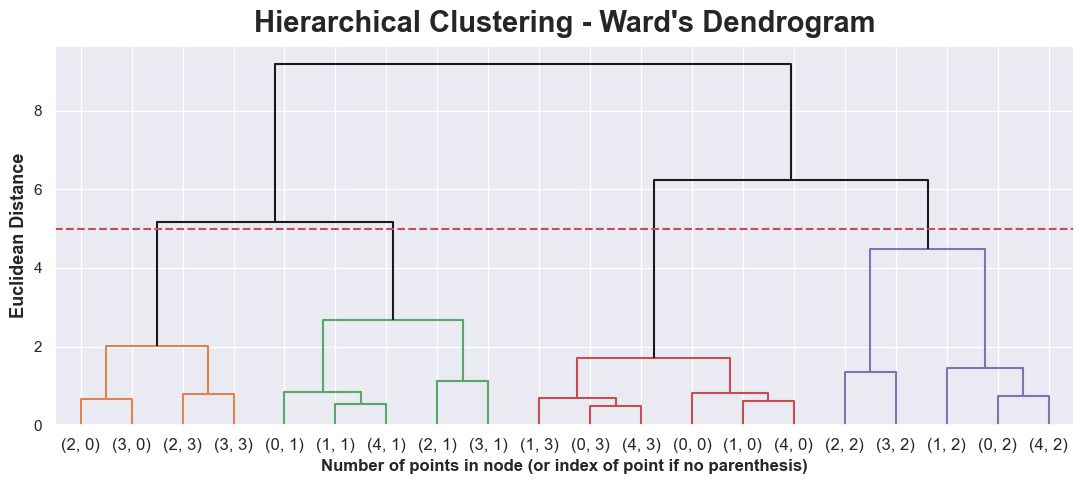

In [125]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 5
dendrogram(linkage_matrix, 
           truncate_mode='level', 
           labels=df_centroids.index, p=5, 
           color_threshold=y_threshold, 
           above_threshold_color='k')

plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'Euclidean Distance', fontsize=13)
plt.show()

In [126]:
# Re-running the Hierarchical clustering based on the correct number of clusters
hclust = AgglomerativeClustering(
    linkage='ward', 
    metric='euclidean', 
    n_clusters=4
)
hclust_labels = hclust.fit_predict(df_centroids)
df_centroids['hclust_labels'] = hclust_labels

df_centroids  # centroid's cluster labels

Age  Contract_Duration  PercentageOfVisits  \
dem_labels freq_labels                                                    
0          0            0.658672          -0.309887           -0.500000   
           1           -0.393953          -0.393962            0.959635   
           2            0.475928          -0.466536            0.881422   
           3            0.438916          -0.452613           -0.151719   
1          0           -0.085728           0.048536           -0.500000   
           1           -0.078537           0.076443            0.591727   
           2           -0.047367           0.027995            0.888706   
           3           -0.081543          -0.019056           -0.102322   
2          0            0.588736           1.107239           -0.500000   
           1           -0.498805           1.375610            1.099373   
           2            1.248980           1.382807            0.952326   
           3            1.019141           1.276586           -0.143909   
3          0            0.335306           1.701319           -0.498225   
           1           -0.325321           1.957982            0.581971   
           2            0.736111           2.185930            1.034375   
           3            0.667083           1.952283           -0.128500   
4          0            0.253340           0.120741           -0.500000   
           1           -0.121559           0.183219            0.847811   
           2            0.475806           0.012391            0.863172   
           3            0.315009          -0.040399           -0.190805   

                        PercentageOfClasses  Freq_Visits_Day  \
dem_labels freq_labels                                         
0          0                       0.583391        -0.372180   
           1                       1.900804         0.197359   
           2                       0.001881         1.701193   
           3                       0.000294         0.031734   
1          0                       0.415180        -0.393858   
           1                       1.668200        -0.014975   
           2                       0.001599         0.547288   
           3                       0.000262        -0.155306   
2          0                       1.135496        -0.335506   
           1                       1.939830         0.092733   
           2                       0.006922         0.959920   
           3                       0.002100        -0.061240   
3          0                       1.186893        -0.428988   
           1                       1.950461        -0.015126   
           2                       0.000587         1.059953   
           3                       0.002013        -0.093141   
4          0                       0.933702        -0.352395   
           1                       1.958986         0.206575   
           2                       0.001995         1.555518   
           3                       0.000421         0.151529   

                        Visits_ActivePeriod  hclust_labels  
dem_labels freq_labels                                      
0          0                      -0.600733              2  
           1                       0.383032              1  
           2                       1.426500              0  
           3                      -0.043177              2  
1          0                      -0.600733              2  
           1                       0.181833              1  
           2                       1.425553              0  
           3                       0.014358              2  
2          0                      -0.600733              3  
           1                       0.617443              1  
           2                       2.046516              0  
           3                      -0.001446              3  
3          0                      -0.598392              3  
           1                      -0.170541           

In [127]:
# Mapper between concatenated clusters and hierarchical clusters
cluster_mapper = df_centroids['hclust_labels'].to_dict()

df_ = data.copy()

# Mapping the hierarchical clusters on the centroids to the observations
df_['merged_labels'] = df_.apply(
    lambda row: cluster_mapper[
        (row['dem_labels'], row['freq_labels'])
    ], axis=1
)

# Merged cluster centroids
df_.groupby('merged_labels')[metric_features].mean()

,Age,Contract_Duration,PercentageOfVisits,PercentageOfClasses,Freq_Visits_Day,Visits_ActivePeriod
merged_labels,,,,,,
0,0.522408,0.271478,0.900214,0.002969,1.169772,1.445406
1,-0.323368,0.627555,0.931340,1.927093,0.137828,0.270243
2,0.231989,-0.096685,-0.244066,0.201617,-0.076773,-0.241613
3,0.764609,1.334327,-0.299775,0.509156,-0.195260,-0.288787


In [128]:
#Merge cluster contigency table
# Getting size of each final cluster
df_counts = df_.groupby('merged_labels')\
    .size()\
    .to_frame()

# Getting the product and behavior labels
df_counts = df_counts\
    .rename({v:k for k, v in cluster_mapper.items()})\
    .reset_index()

df_counts['dem_labels'] = df_counts['merged_labels'].apply(lambda x: x[0])
df_counts['freq_labels'] = df_counts['merged_labels'].apply(lambda x: x[1])

df_counts.pivot(values=0, index='dem_labels', columns='freq_labels')

freq_labels,1,2,3
dem_labels,,,
3,NaN,NaN,1774.0
4,3044.0,3507.0,6362.0


In [129]:
df = df_.copy()

## Profiling:

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings 

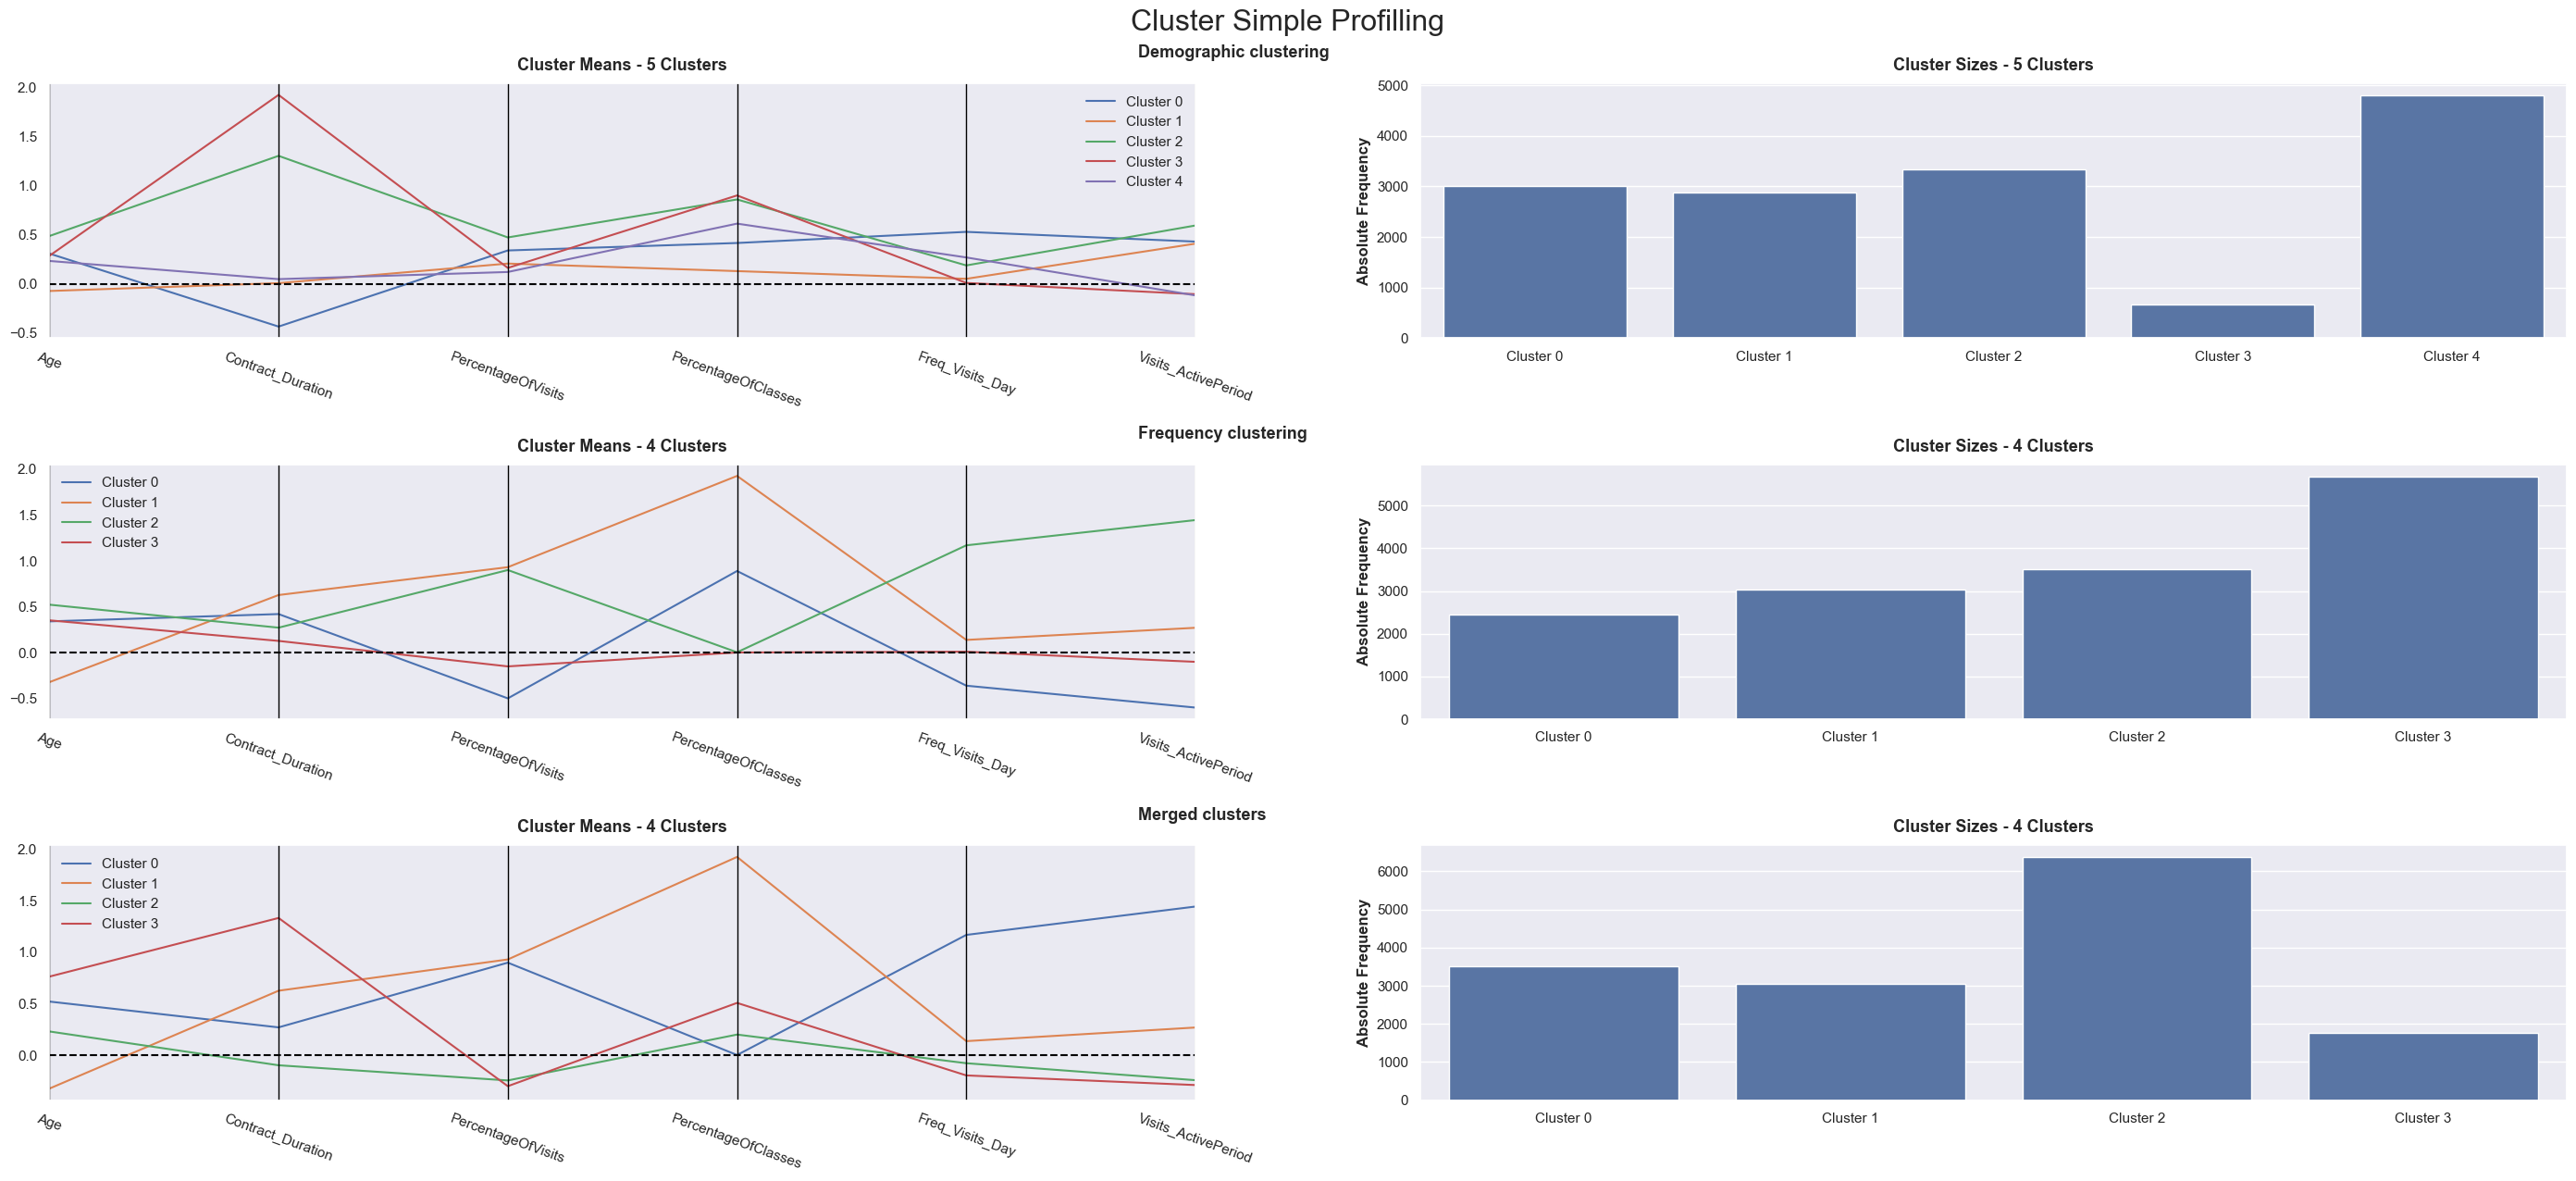

In [130]:
# Profilling each cluster (product, behavior, merged)
cluster_profiles(
    df = df[metric_features + ['dem_labels', 'freq_labels', 'merged_labels']], 
    label_columns = ['dem_labels', 'freq_labels', 'merged_labels'], 
    figsize = (28, 13), 
    compar_titles = ["Demographic clustering", "Frequency clustering", "Merged clusters"])

In [131]:
sst = get_ss(df[metric_features])  # get total sum of squares
ssw_labels = df[metric_features+ ["merged_labels"]].groupby(by='merged_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.3395


In [132]:
df_study= df[["merged_labels"] + metric_features].groupby(["merged_labels"]).sum()

In [133]:
df_study[metric_features].apply(lambda col: col/(col.sum())).style.format(precision=2).background_gradient(axis=0)

,Age,Contract_Duration,PercentageOfVisits,PercentageOfClasses,Freq_Visits_Day,Visits_ActivePeriod
merged_labels,,,,,,
0,0.50,0.21,0.81,0.00,1.11,1.32
1,-0.27,0.41,0.73,0.73,0.11,0.21
2,0.40,-0.13,-0.40,0.16,-0.13,-0.40
3,0.37,0.51,-0.14,0.11,-0.09,-0.13


In [134]:
df_study= df[["merged_labels"] + activities].groupby(["merged_labels"]).sum()

In [135]:
df_study[activities].apply(lambda col: col/(col.sum())).style.format(precision=2).background_gradient(axis=0)

,AthleticsActivities,WaterActivities,FitnessActivities,TeamActivities,RacketActivities,CombatActivities,SpecialActivities,OtherActivities
merged_labels,,,,,,,,
0,0.23,0.12,0.34,0.07,0.01,0.11,0.40,0.07
1,0.07,0.49,0.06,0.46,0.72,0.07,0.27,0.46
2,0.50,0.26,0.49,0.29,0.22,0.63,0.16,0.21
3,0.20,0.13,0.12,0.18,0.05,0.18,0.17,0.25


In [136]:
df_study= df[["merged_labels"] + compare].groupby(["merged_labels"]).sum()

In [137]:
df_study[compare].apply(lambda col: col/(col.sum())).style.format(precision=2).background_gradient(axis=0)

,Dropout,Gender_Female,UseByTime
merged_labels,,,
0,0.23,0.23,0.34
1,0.16,0.20,0.10
2,0.50,0.45,0.30
3,0.12,0.12,0.27
